In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Business Objectives***

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


In [2]:
#Importing all the necessary Libraries for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
#Reading the data using Pandas library
appl_data=pd.read_csv("/content/drive/MyDrive/application_data (1).csv")
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#finding the shape of the appl_data
appl_data.shape

(307511, 122)

In [5]:
#getting the info of the data
appl_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
#finding the missing values in the data using isnull and sorting it descending order
appl_data.isnull().sum().sort_values(ascending=False).head(100)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_AVG        213514
                                ...  
LIVE_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_WORK_CITY              0
TARGET                              0
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
Length: 100, dtype: int64

In [7]:
#since missing values are there ,converting the count to % to understand
(appl_data.isnull().sum()/len(appl_data)*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [8]:
#Missing value Treatment
#removing those columns more than 40% missing values using drop
appl_data.drop(["COMMONAREA_MEDI","COMMONAREA_AVG","COMMONAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAPARTMENTS_AVG","NONLIVINGAPARTMENTS_MEDI","FONDKAPREMONT_MODE","LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_AVG","LIVINGAPARTMENTS_MEDI","FLOORSMIN_AVG","FLOORSMIN_MODE","FLOORSMIN_MEDI","YEARS_BUILD_MEDI","YEARS_BUILD_MODE","YEARS_BUILD_AVG","OWN_CAR_AGE","LANDAREA_MEDI","LANDAREA_MODE","LANDAREA_AVG","BASEMENTAREA_MEDI","BASEMENTAREA_AVG","BASEMENTAREA_MODE","EXT_SOURCE_1","NONLIVINGAREA_MODE","NONLIVINGAREA_AVG","NONLIVINGAREA_MEDI","ELEVATORS_MEDI","ELEVATORS_AVG","ELEVATORS_MODE","WALLSMATERIAL_MODE","APARTMENTS_MEDI","APARTMENTS_AVG","APARTMENTS_MODE","ENTRANCES_MEDI","ENTRANCES_AVG","ENTRANCES_MODE","LIVINGAREA_AVG","LIVINGAREA_MODE","LIVINGAREA_MEDI","HOUSETYPE_MODE","FLOORSMAX_MODE","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE","EMERGENCYSTATE_MODE"],axis=1,inplace=True)


In [9]:
#rechecking the shape
appl_data.shape

(307511, 73)

In [10]:
#REMOVING THE COLUMNS WHICH ARE NOT USEFUL FOR ANALYSIS
flag_col=appl_data[["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]]
appl_data.drop(flag_col,axis=1,inplace=True)


In [11]:
#changing the negative value to positive through abs()
appl_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=abs(appl_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]])

In [12]:
#separating numeric and categorical variables for better understanding
numer_var=appl_data.select_dtypes(include=[np.number])
cat_var=appl_data.select_dtypes(exclude=[np.number])

In [13]:
#checking the missing % in numer_var
(100*numer_var.isna().sum()/len(numer_var)).sort_values(ascending=False).head(15)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [14]:
#Checking the describe() of variable to check outlier to fill the missing value with median
appl_data[["EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"]].describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05,307499.000000,307509.000000,307510.000000
mean,0.510853,1.899974,0.034362,0.265474,0.267395,0.006402,0.007000,0.100049,1.422245,0.143421,1.405292,5.143927e-01,5.383962e+05,27108.573909,2.152665,962.858788
std,0.194844,1.869295,0.204685,0.794056,0.916002,0.083849,0.110757,0.362291,2.400989,0.446698,2.379803,1.910602e-01,3.694465e+05,14493.737315,0.910682,826.808487
min,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,1615.500000,1.000000,0.000000
25%,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,2.385000e+05,16524.000000,2.000000,274.000000
50%,0.535276,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,4.500000e+05,24903.000000,2.000000,757.000000
75%,0.669057,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,6.636171e-01,6.795000e+05,34596.000000,3.000000,1570.000000
max,0.896010,25.000000,8.000000,261.000000,27.000000,4.000000,9.000000,24.000000,348.000000,34.000000,344.000000,8.549997e-01,4.050000e+06,258025.500000,20.000000,4292.000000


In [15]:
#Treatment of missing values in numer_var with median of the variable because some of the var has some outliers
numer_missing=numer_var.isna().columns
for i in numer_missing:
    numer_var[i].fillna(numer_var[i].median(),inplace=True)

In [16]:
#confirming no missing value in numer_var
(100*numer_var.isna().sum()/len(numer_var)).sort_values(ascending=False).head(60)

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
REG_REGION_NOT_LIVE_REGION     0.0
REGION_RATING_CLIENT_W_CITY    0.0
TARGET                         0.0
REGION_RATING_CLIENT           0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
REGION_POPULATION_RE

In [17]:
#checking the missing % in cat_var
(100*cat_var.isna().sum()/len(cat_var)).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

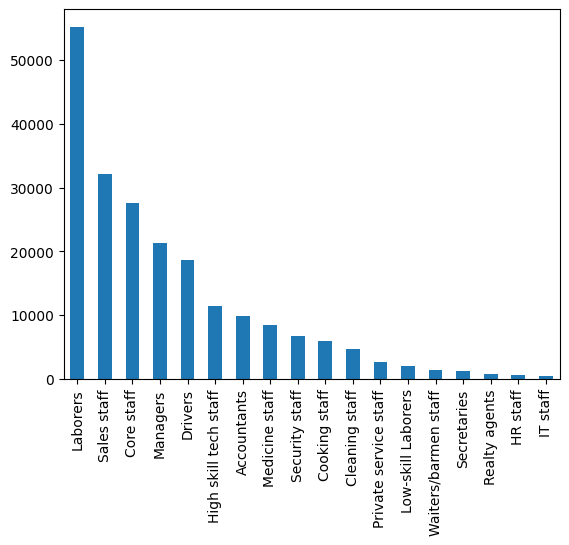

In [18]:
#checking the max occupation type
cat_var["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.show()

In [19]:
#As there are various occupation We cannot assume the missing value of occupation_type as Labours because there might be per working in some other field also,so treating it as missing itself
cat_var["OCCUPATION_TYPE"].fillna(np.NaN,inplace=True)

In [20]:
#since missing value in categorical variable can be imputed using mode of the variable,we are imputing it
cat_var["NAME_TYPE_SUITE"].fillna(cat_var["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [21]:
#confirming there are no missing values in categorical variables
(100*cat_var.isna().sum()/len(cat_var)).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
dtype: float64

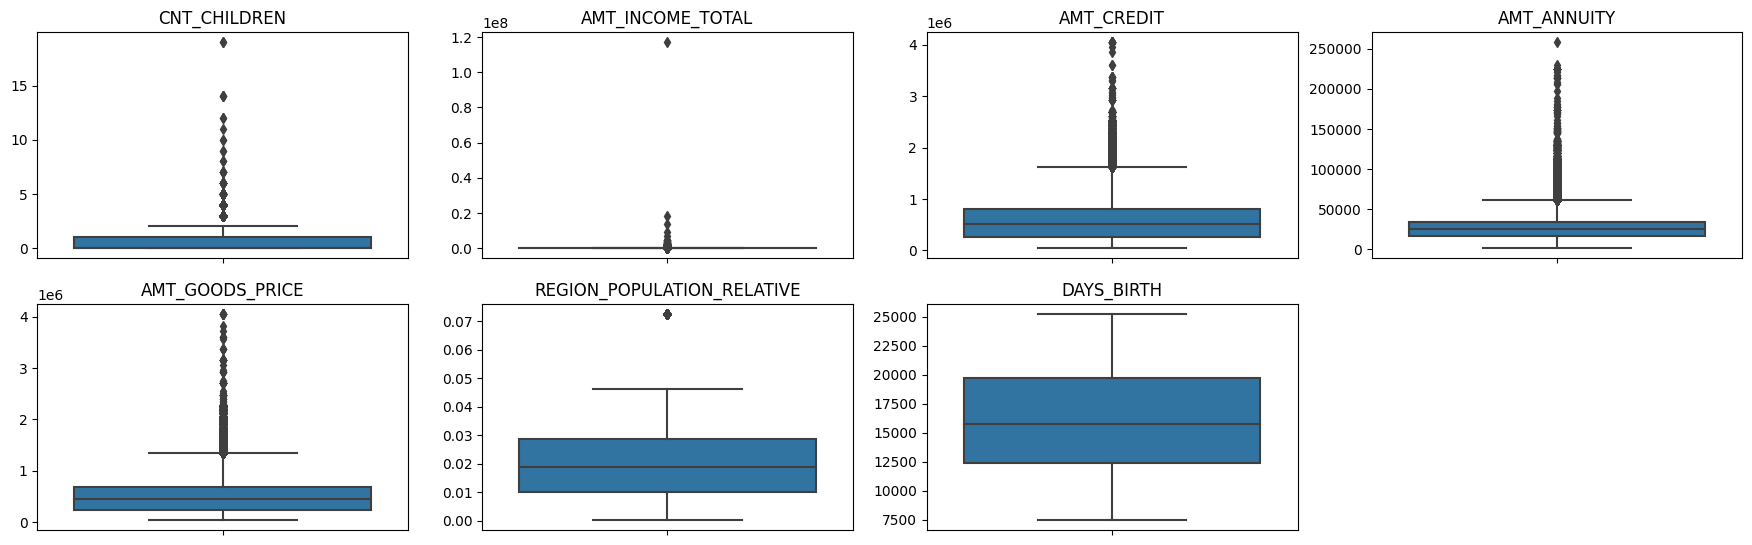

In [22]:
#Identifying oultiers in appl_data
col=numer_var[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH']]
plt.figure(figsize=(22,10))
for i in enumerate(col):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(y=numer_var[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [23]:
#except DAYS_BIRTH all has outliers

In [24]:
#CHECkING THE NEARBY VALUE USING QUANTILE 
numer_var[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']].quantile([0.75,0.95,0.99,1.0])

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH
0.75,1.0,202500.0,808650.0,34596.0,679500.0,0.028663,19682.0
0.95,2.0,337500.0,1350000.0,53325.0,1305000.0,0.046220,23204.0
0.99,3.0,472500.0,1854000.0,70006.5,1800000.0,0.072508,24419.0
1.00,19.0,117000000.0,4050000.0,258025.5,4050000.0,0.072508,25229.0


In [25]:
#TREATMENT OF THE OUTLIERS BY CAPPING THE MEDIAN/QUANTILE VALUE,and here doing it with quantile value
numer_var.loc[numer_var["AMT_INCOME_TOTAL"]>500000,["AMT_INCOME_TOTAL"]]=numer_var["AMT_INCOME_TOTAL"].quantile(0.99)
numer_var.loc[numer_var["CNT_CHILDREN"]>4,["CNT_CHILDREN"]]=numer_var["CNT_CHILDREN"].quantile(0.99)
numer_var.loc[numer_var["AMT_CREDIT"]>1900000,["AMT_CREDIT"]]=numer_var["AMT_CREDIT"].quantile(0.99)
numer_var.loc[numer_var["AMT_ANNUITY"]>500000,["AMT_ANNUITY"]]=numer_var["AMT_ANNUITY"].quantile(0.99)
numer_var.loc[numer_var["AMT_GOODS_PRICE"]>1900000,["AMT_GOODS_PRICE"]]=numer_var["AMT_GOODS_PRICE"].quantile(0.99)
numer_var.loc[numer_var["REGION_POPULATION_RELATIVE"]>500000,["REGION_POPULATION_RELATIVE"]]=numer_var["REGION_POPULATION_RELATIVE"].quantile(0.99)

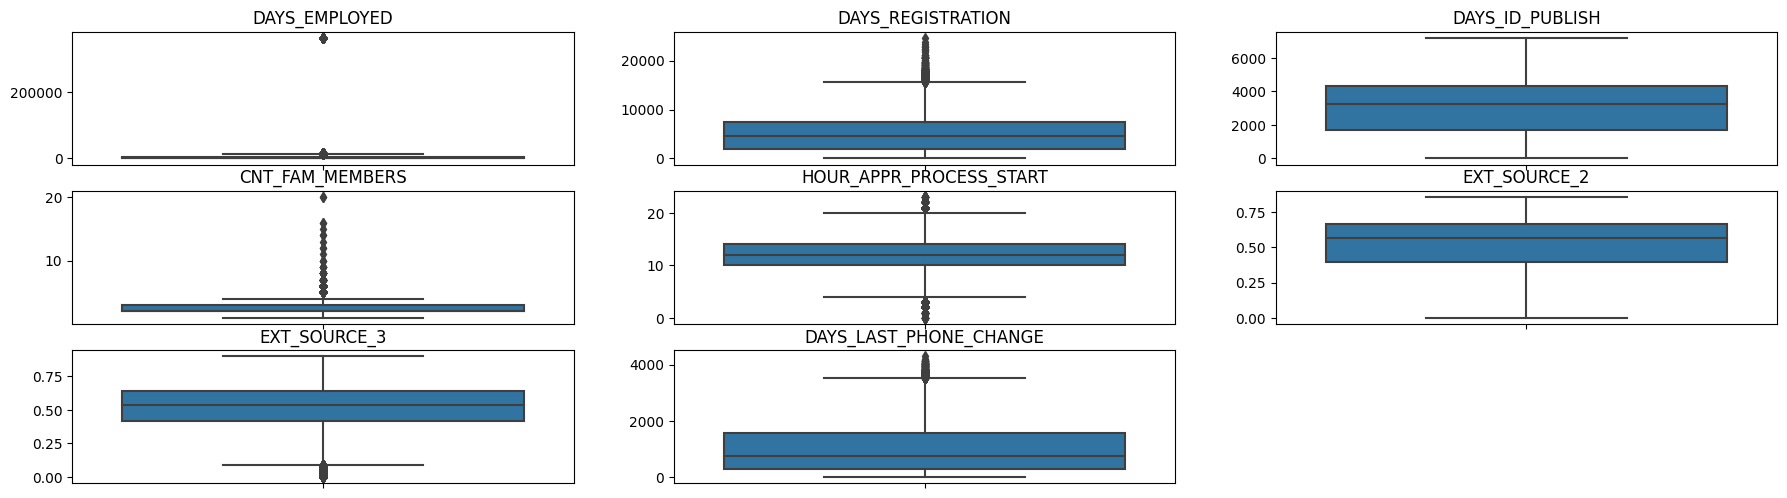

In [26]:
col1=numer_var[['DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']]
plt.figure(figsize=(22,10))
for i in enumerate(col1):
  plt.subplot(5,3,i[0]+1)
  sns.boxplot(y=numer_var[i[1]])
  plt.title(i[1])
  plt.ylabel("")

In [27]:
#CHECING THE NEARBY VALUE USING QUANTILE 
numer_var[['DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']].quantile([0.75,0.95,0.99,1.0])

,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0.75,5707.0,7479.5,4299.0,3.0,14.0,0.663422,0.636376,1570.0
0.95,365243.0,11416.0,4944.0,4.0,17.0,0.747681,0.777659,2522.0
0.99,365243.0,13879.0,5447.0,5.0,19.0,0.782766,0.832785,3149.0
1.00,365243.0,24672.0,7197.0,20.0,23.0,0.855000,0.896010,4292.0


In [28]:
#checking the 80% for days employed for capping since 95% and 99% are nit possible
numer_var["DAYS_EMPLOYED"].quantile(0.80)

9188.0

In [29]:
#treatment of the outlier
#capping it to quantile values
numer_var.loc[numer_var["DAYS_EMPLOYED"]>10000,["DAYS_EMPLOYED"]]=numer_var["DAYS_EMPLOYED"].quantile(0.80)
numer_var.loc[numer_var["DAYS_REGISTRATION"]>14000,["DAYS_REGISTRATION"]]=numer_var["DAYS_REGISTRATION"].quantile(0.99)
numer_var.loc[numer_var["CNT_FAM_MEMBERS"]>5,["CNT_FAM_MEMBERS"]]=numer_var["CNT_FAM_MEMBERS"].quantile(0.99)
numer_var.loc[numer_var["HOUR_APPR_PROCESS_START"]>5,["HOUR_APPR_PROCESS_START"]]=numer_var["HOUR_APPR_PROCESS_START"].quantile(0.99)
#remaing don't have outiers

<Axes: >

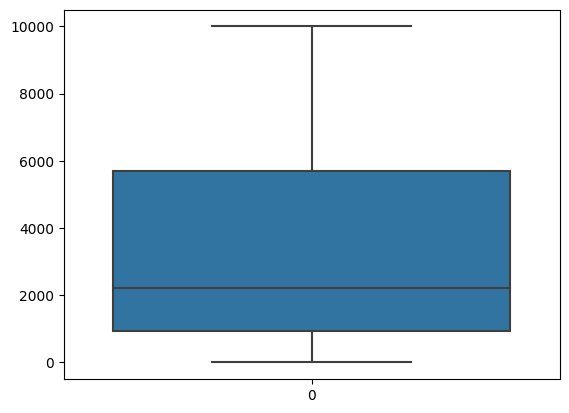

In [30]:
#checking no outlier
sns.boxplot(numer_var["DAYS_EMPLOYED"])

In [31]:
##BINNING THE AGE VALUE
bin=[0,20,30,40,50,60,70,80]
appl_data['Age_Category'] =pd.cut(appl_data["DAYS_BIRTH"],bins=bin,labels=['0-20','20-30','30-40','40-50','50-60','60-70','70+'])

In [32]:
##DROPPING DAYS BIRTH
appl_data.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [33]:
#concatinating the numeric and categorical variable back in the data set
appl_data=pd.concat([numer_var,cat_var],axis=1)

In [34]:
#checking the shape is same as before
appl_data.shape

(307511, 53)

In [35]:
#checking the data imbalance
appl_data["TARGET"].value_counts()/len(appl_data)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<Axes: >

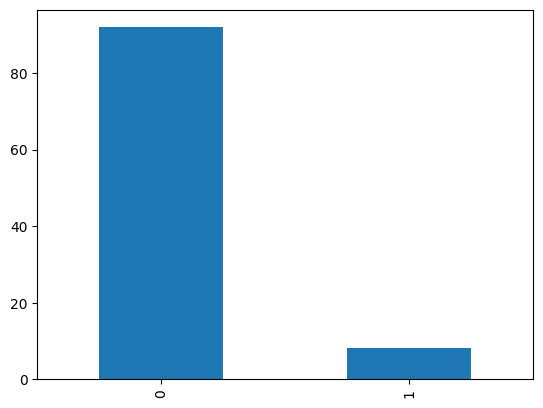

In [36]:
#checking the data imbalance through visualization of the target variable
(appl_data["TARGET"].value_counts()/len(appl_data)*100).plot.bar()

In [37]:
#since data are imbalanced seperating both for analysis
target_0=appl_data.loc[appl_data["TARGET"]==0]
target_1=appl_data.loc[appl_data["TARGET"]==1]

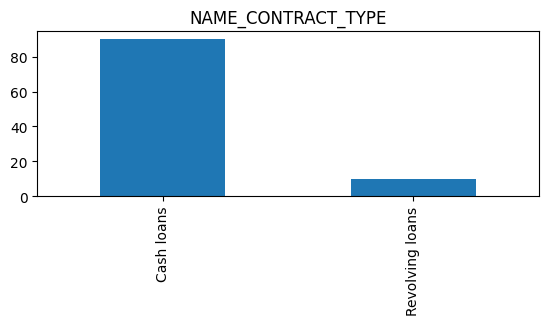

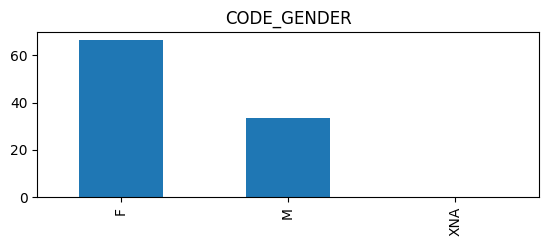

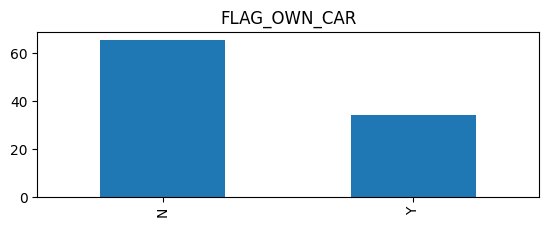

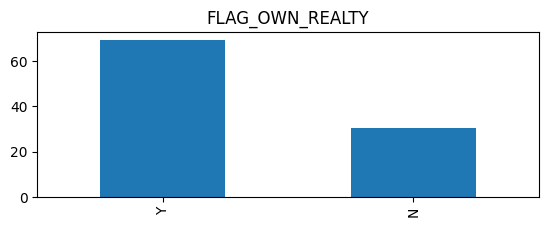

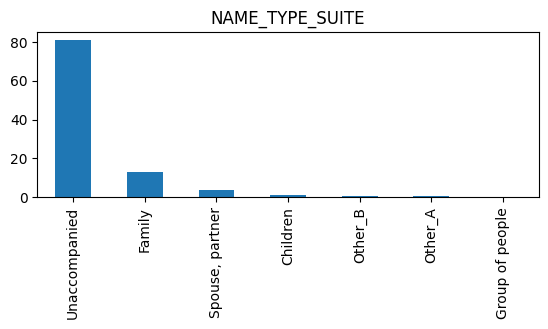

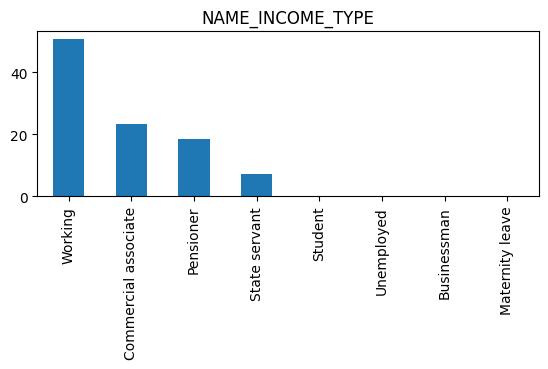

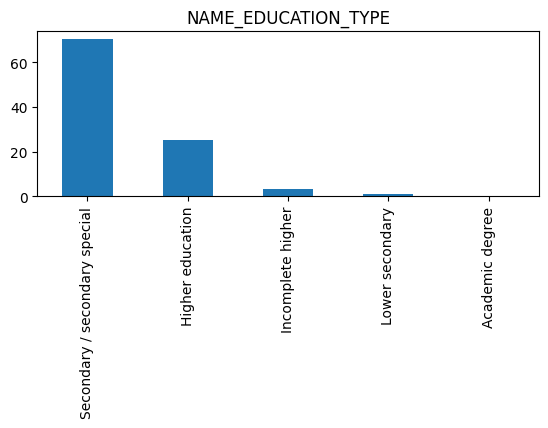

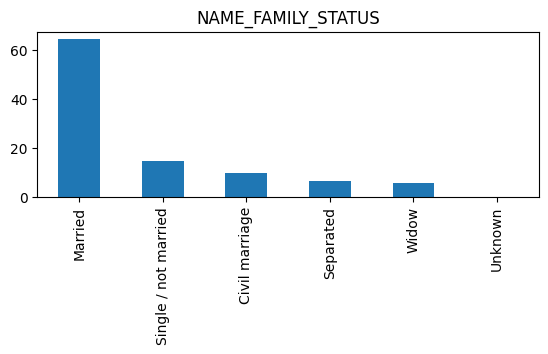

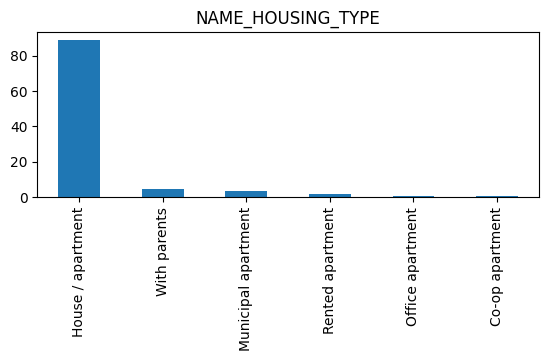

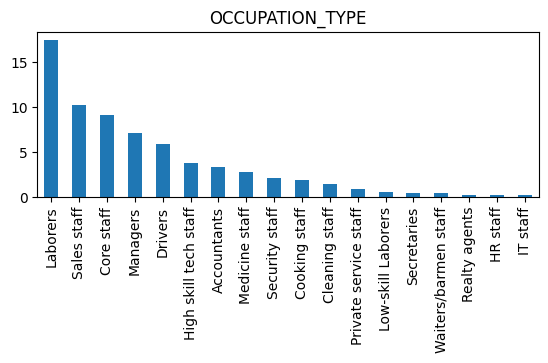

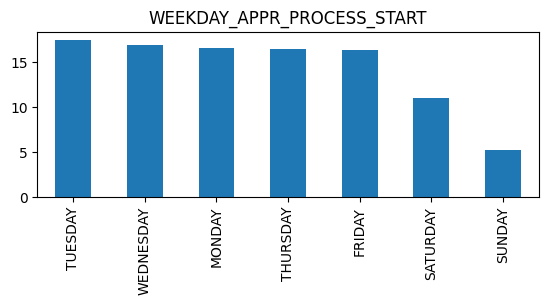

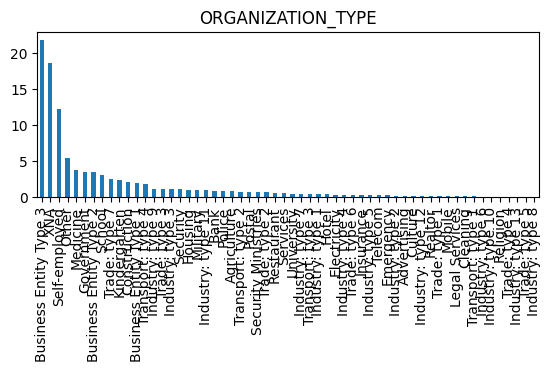

In [38]:
#starting analysis with categorical column by separating them
target_0cat=target_0.select_dtypes(include=["object"]).columns
for i in enumerate(target_0cat):
  fig=plt.figure(figsize=(22,15))
  ax1=plt.subplot(6,3,i[0]+1)
  (100*(target_0[i[1]].value_counts())/(len(target_0[i[1]]))).plot.bar()
  plt.title(i[1])
  plt.show()

In [39]:
#INSIGHTS 

#NAME_CONTRACT_TYPE---90% of the total loans are Cash Loans and 10% are Revolving loans.

#CODE_GENDER --60% above female take loan but male are 30% above

#FLAG_OWN_CAR--above 60% of customer don't have car

#NAME_TYPE_SUITE---above 80% of the customer are unaccompained

#NAME_INCOME_TYPE----clients in the type of working,commercial associate,pensioner are more when compared to other type

#NAME_EDUCATION_TYPE----more no of clients are well educated having done secondary special

#NAME_FAMILY_STATUS ---most of the customer are married

#NAME_HOUSING_TYPE---max customer has stay in own house

#OCCUPATION_TYPE---Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.





## The impotant variables seems affecting the targets are CODE_GENDER , NAME_INCOME_TYPE , NAME_EDUCATION_TYPE , NAME_FAMILY_STATUS , OCCUPATION_TYPE .

In [40]:
target_0.select_dtypes(include=np.number).columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',

# *Univariate Analysis of Categorical columns*

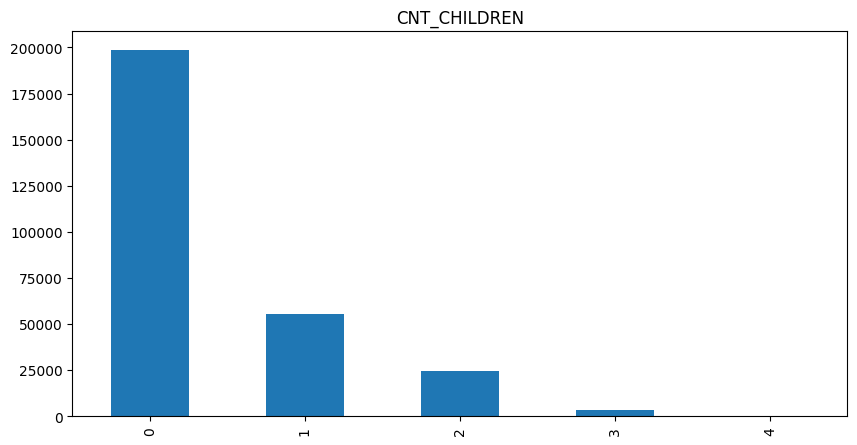

In [41]:
#starting analysis with important numerical column of non-defaulter 
#'CNT_CHILDREN'
plt.figure(figsize=(10,5))
target_0['CNT_CHILDREN'].value_counts().plot.bar()
plt.title("CNT_CHILDREN")
plt.show()

In [42]:
## non-defaulters mostly don't have children

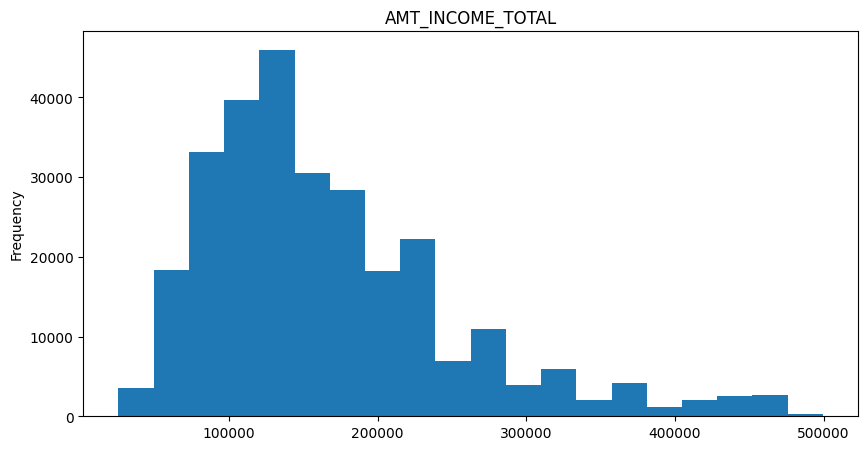

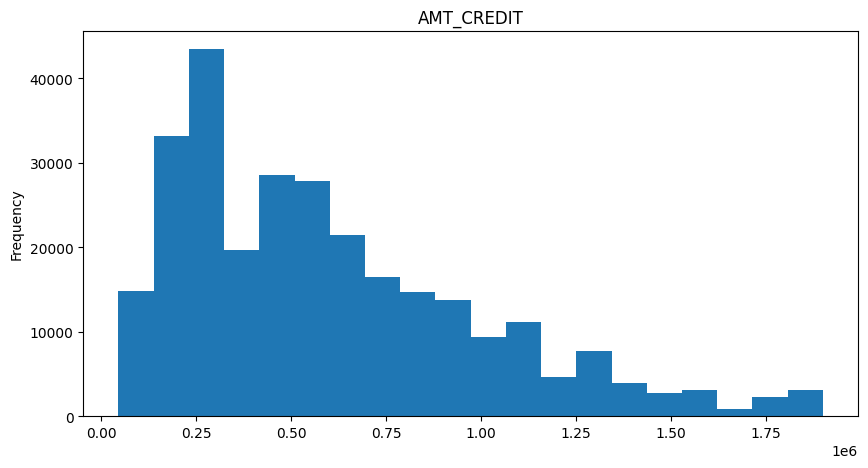

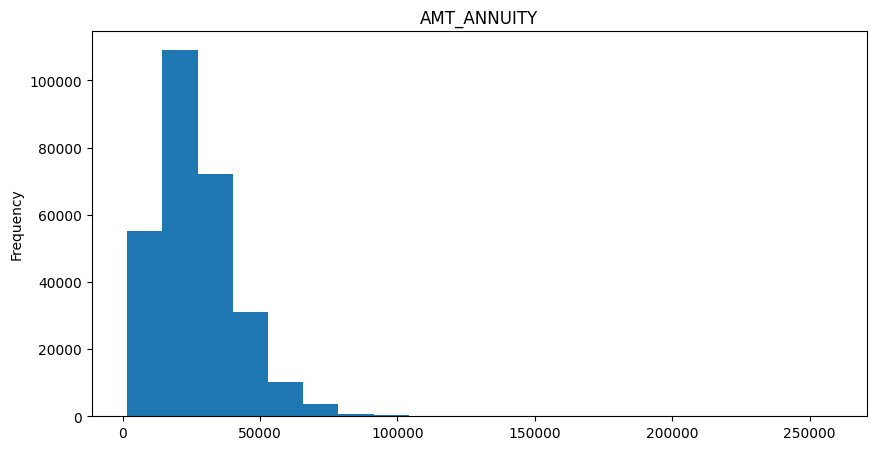

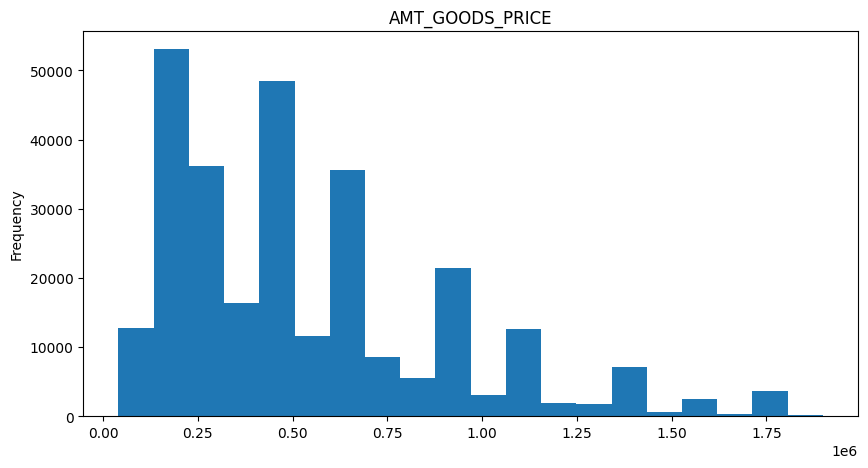

In [43]:
#'AMT_INCOME_TOTAL''AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'
amt_col=target_0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
for i in enumerate(amt_col):
    plt.figure(figsize=(10,5))  
    plt.subplot(1,1,1)
    target_0[i[1]].plot.hist(bins=20)
    plt.title(i[1])
    plt.show()

In [44]:
##INSIGHTS 

#'AMT_INCOME_TOTAL'--- most clients are having income in the range of 1 lakh to 2 lakh

#'AMT_CREDIT'---most of the clients credited in the range of 2,00,000-4,00,000 lakh

#'AMT_ANNUITY'---most of them are in the range of 0-50000

#'AMT_GOODS_PRICE'----goods price are mostly below 1 lakh


The impotant variables seems affecting the targets are AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

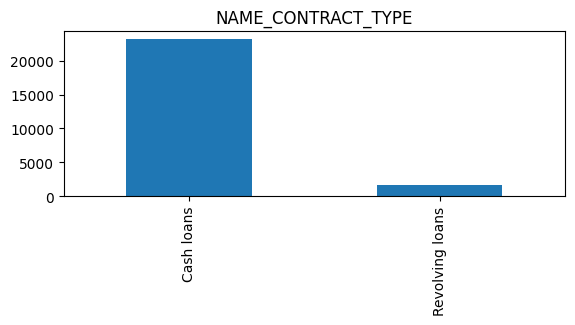

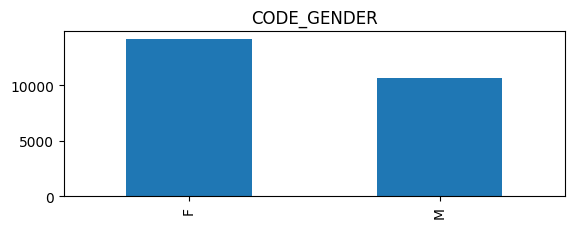

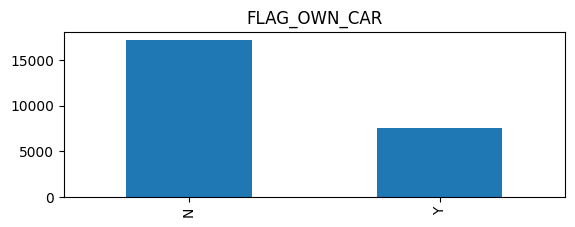

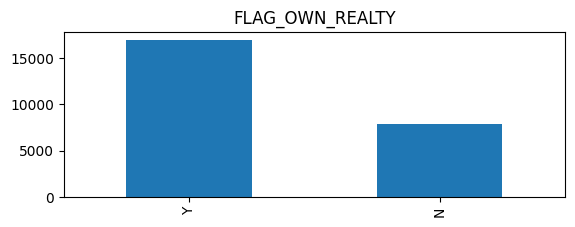

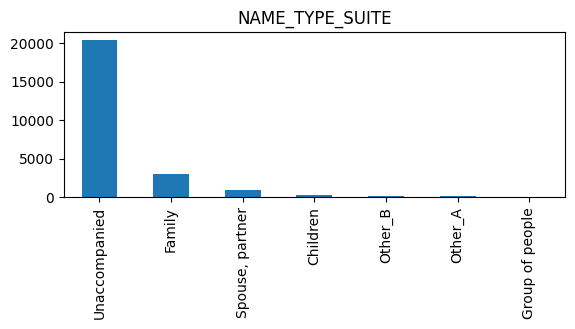

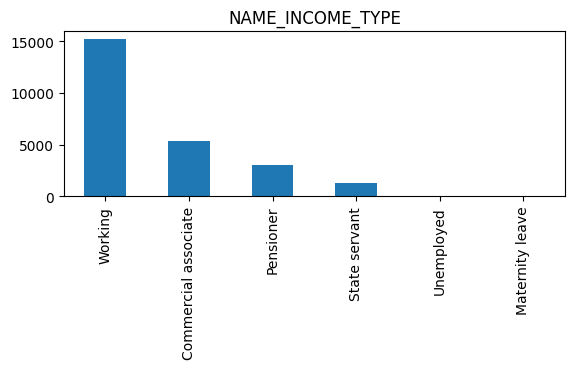

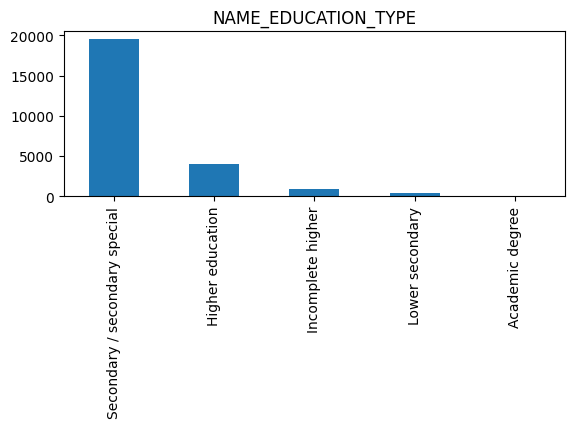

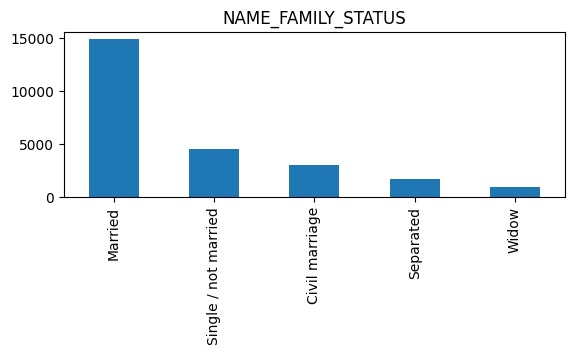

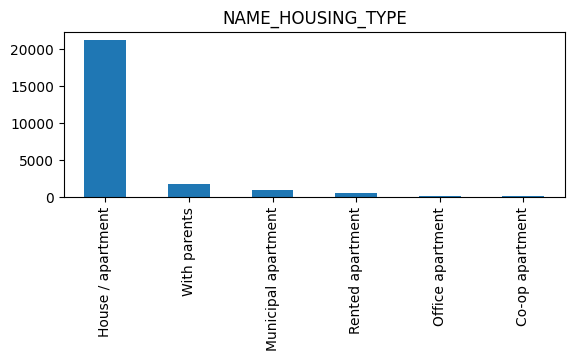

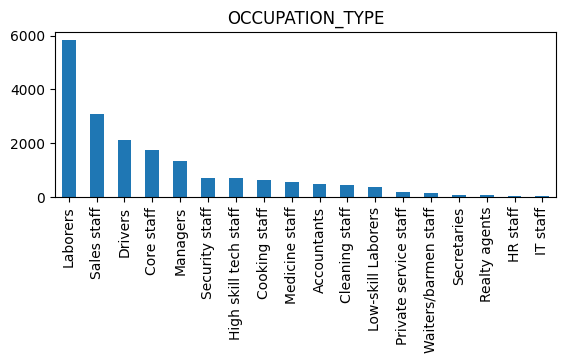

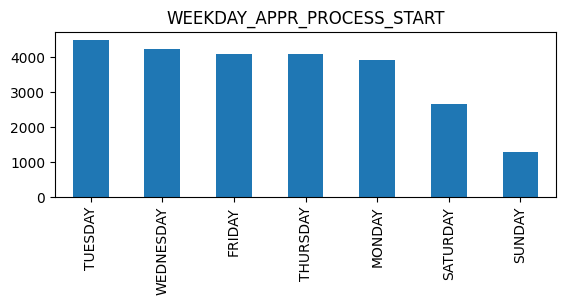

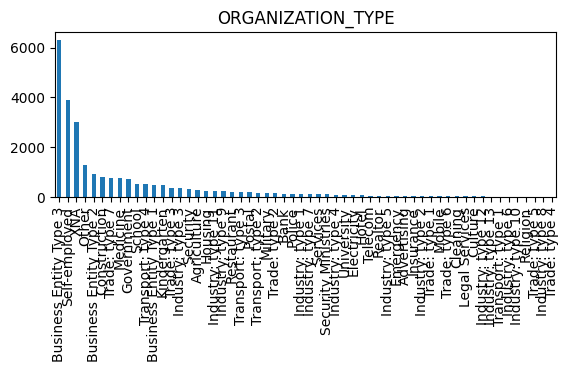

In [45]:
# analysis with categorical column with target=1 by separating them
target_1cat=target_1.select_dtypes(include=["object"]).columns
for i in enumerate(target_1cat):
  fig=plt.figure(figsize=(22,15))
  ax1=plt.subplot(6,3,i[0]+1)
  target_1[i[1]].value_counts().plot.bar()
  plt.title(i[1])
  plt.show()

In [46]:
#SAME INSIGHTS WE GET  FOR DEFAULTER SIMILAR TO THE CATEGORICAL VARIABLE OF NON-DEFAULTER

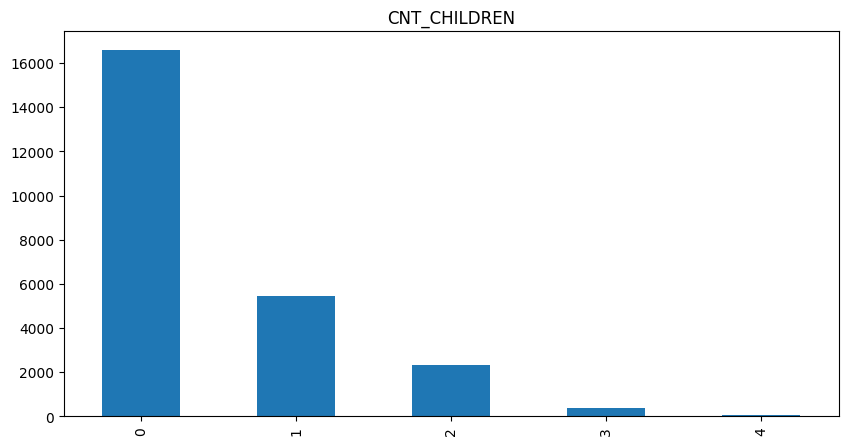

In [47]:
#starting analysis with important numerical column of defaulter 
#'CNT_CHILDREN'
plt.figure(figsize=(10,5))
target_1['CNT_CHILDREN'].value_counts().plot.bar()
plt.title("CNT_CHILDREN")
plt.show()

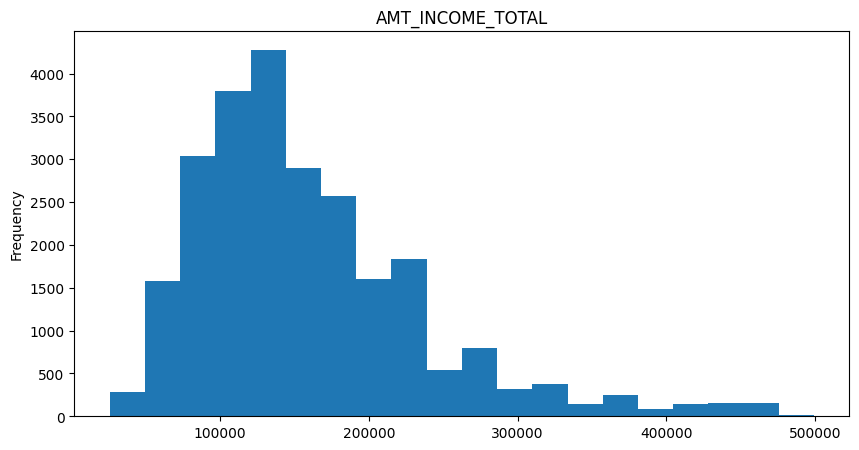

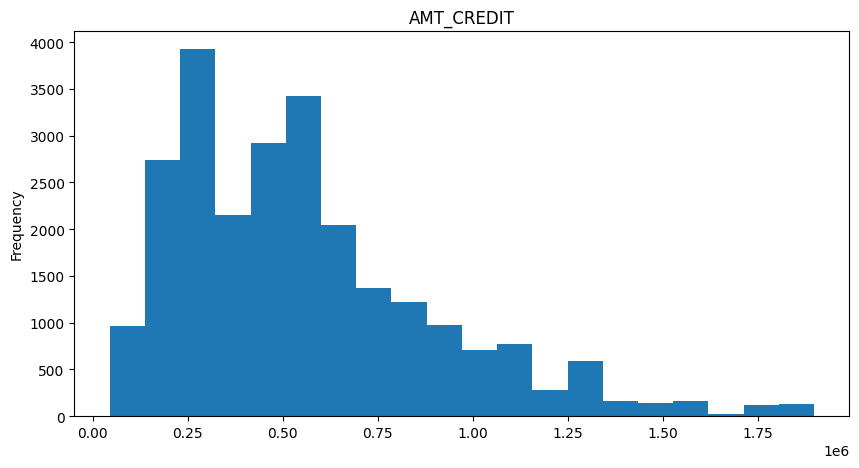

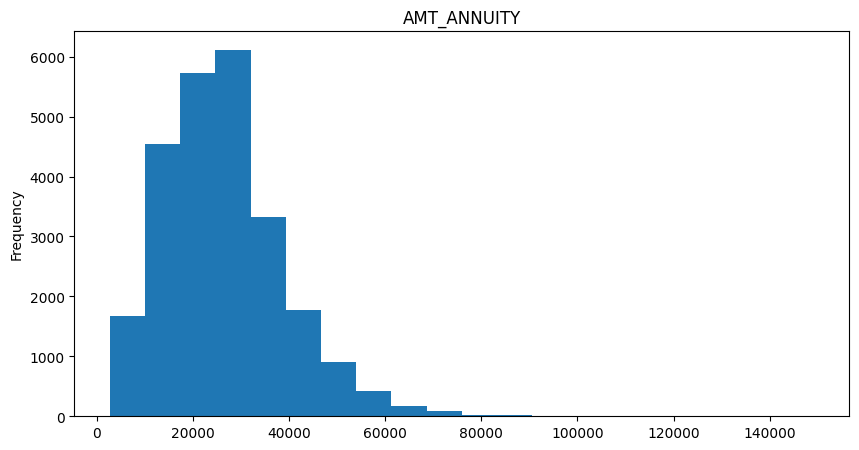

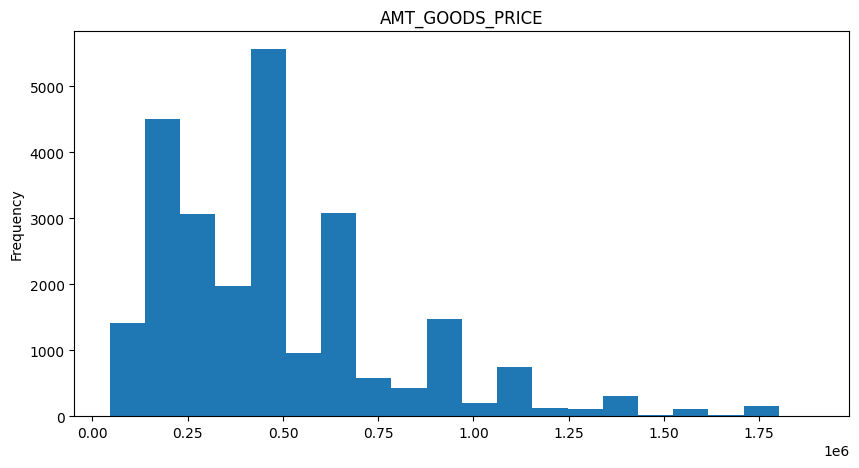

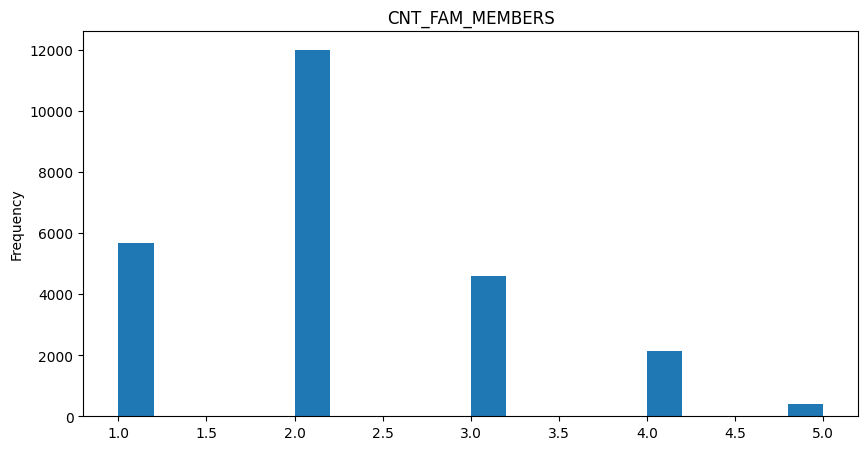

In [48]:
#'AMT_INCOME_TOTAL''AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'
amt_col1=target_1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS']]
for i in enumerate(amt_col1):
    plt.figure(figsize=(10,5))  
    plt.subplot(1,1,1)
    target_1[i[1]].plot.hist(bins=20)
    plt.title(i[1])
    plt.show()

In [49]:
###SAME INSIGHTS WE GET  FOR DEFAULTER SIMILAR TO THE NUMERICAL VARIABLE OF NON-DEFAULTER

In [50]:
#reading the previous dataset
pre_data=pd.read_csv("/content/drive/MyDrive/previous_application.csv")
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#finding the shape of the previous data
pre_data.shape

(1670214, 37)

In [52]:
#droping duplicate rows
pre_data.drop_duplicates(subset="SK_ID_CURR",inplace=True)

In [53]:
#rechecking the shape
pre_data.shape

(338857, 37)

In [54]:
#checking the missing% in previous application
(pre_data.isna().sum()/len(pre_data)*100).sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED     99.387352
RATE_INTEREST_PRIMARY        99.387352
NAME_TYPE_SUITE              47.683831
RATE_DOWN_PAYMENT            39.042133
AMT_DOWN_PAYMENT             39.042133
NFLAG_INSURED_ON_APPROVAL    26.795079
DAYS_FIRST_DRAWING           26.795079
DAYS_FIRST_DUE               26.795079
DAYS_LAST_DUE_1ST_VERSION    26.795079
DAYS_LAST_DUE                26.795079
DAYS_TERMINATION             26.795079
AMT_GOODS_PRICE              15.921170
AMT_ANNUITY                  15.078632
CNT_PAYMENT                  15.077747
PRODUCT_COMBINATION           0.015346
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
SELLERPLACE_AREA              0.000000
NAME_SELLER_INDUSTRY          0.000000
dtype: float64

In [55]:
#dropping those columns with missing values more than 40%
pre_missing=pre_data.columns[(pre_data.isna().sum()/len(pre_data)*100)>40]
pre_data.drop(pre_missing,axis=1,inplace=True)

In [56]:
#changing the negative value to positive through abs()
pre_data[["DAYS_DECISION","SELLERPLACE_AREA","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]]=abs(pre_data[["DAYS_DECISION","SELLERPLACE_AREA","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]])

In [57]:
#separating numeric and categorical variables for better understanding
numer_var1=pre_data.select_dtypes(include=[np.number])
cat_var1=pre_data.select_dtypes(exclude=[np.number])

In [58]:
#checking the missing %
(numer_var1.isna().sum()/len(pre_data)*100).sort_values(ascending=False).head(20)

RATE_DOWN_PAYMENT            39.042133
AMT_DOWN_PAYMENT             39.042133
DAYS_FIRST_DRAWING           26.795079
DAYS_TERMINATION             26.795079
DAYS_LAST_DUE                26.795079
DAYS_LAST_DUE_1ST_VERSION    26.795079
DAYS_FIRST_DUE               26.795079
NFLAG_INSURED_ON_APPROVAL    26.795079
AMT_GOODS_PRICE              15.921170
AMT_ANNUITY                  15.078632
CNT_PAYMENT                  15.077747
NFLAG_LAST_APPL_IN_DAY        0.000000
SK_ID_CURR                    0.000000
DAYS_DECISION                 0.000000
SELLERPLACE_AREA              0.000000
HOUR_APPR_PROCESS_START       0.000000
AMT_CREDIT                    0.000000
AMT_APPLICATION               0.000000
SK_ID_PREV                    0.000000
dtype: float64

In [59]:
numer_var1[["RATE_DOWN_PAYMENT","AMT_DOWN_PAYMENT","DAYS_FIRST_DRAWING","DAYS_TERMINATION","DAYS_LAST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DUE","NFLAG_INSURED_ON_APPROVAL","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT"]].describe()

,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,206560.000000,2.065600e+05,248060.000000,248060.000000,248060.000000,248060.000000,248060.000000,248060.000000,2.849070e+05,287762.000000,287765.000000
mean,0.081472,7.214260e+03,345884.572374,85239.992034,78891.136487,29202.446356,13534.768258,0.265996,1.818291e+05,14231.100868,14.057682
std,0.109621,2.249780e+04,81698.882199,153651.928234,149403.265708,97702.902925,66270.633004,0.441863,2.602719e+05,13381.062510,12.129195
min,0.000000,0.000000e+00,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,365243.000000,390.000000,393.000000,204.000000,430.000000,0.000000,4.720500e+04,5899.140000,6.000000
50%,0.062693,1.800000e+03,365243.000000,1100.000000,1074.000000,595.000000,817.000000,0.000000,9.386550e+04,10121.422500,12.000000
75%,0.108914,8.550000e+03,365243.000000,2524.000000,2417.000000,1593.000000,1719.000000,1.000000,1.845000e+05,17461.338750,18.000000
max,0.989740,2.150100e+06,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,5.850000e+06,417927.645000,72.000000


In [60]:
#checking quantile values for few columns since median is not correct
numer_var1["DAYS_FIRST_DRAWING"].quantile(0.01)

263.0

In [61]:
#Treating the missing value with the medain and quantile
numer_var1["RATE_DOWN_PAYMENT"].fillna(pre_data["RATE_DOWN_PAYMENT"].median(),inplace=True)
numer_var1["AMT_DOWN_PAYMENT"].fillna(pre_data["AMT_DOWN_PAYMENT"].median(),inplace=True)
numer_var1["DAYS_FIRST_DRAWING"].fillna(pre_data["DAYS_FIRST_DRAWING"].quantile(0.01),inplace=True)
numer_var1["DAYS_TERMINATION"].fillna(pre_data["DAYS_TERMINATION"].median(),inplace=True)
numer_var1["DAYS_LAST_DUE"].fillna(pre_data["DAYS_LAST_DUE"].median(),inplace=True)
numer_var1["DAYS_LAST_DUE_1ST_VERSION"].fillna(pre_data["DAYS_LAST_DUE_1ST_VERSION"].median(),inplace=True)
numer_var1["DAYS_FIRST_DUE"].fillna(pre_data["DAYS_FIRST_DUE"].median(),inplace=True)
numer_var1["NFLAG_INSURED_ON_APPROVAL"].fillna(pre_data["NFLAG_INSURED_ON_APPROVAL"].median(),inplace=True)
numer_var1["AMT_GOODS_PRICE"].fillna(pre_data["AMT_GOODS_PRICE"].median(),inplace=True)
numer_var1["AMT_ANNUITY"].fillna(pre_data["AMT_ANNUITY"].median(),inplace=True)
numer_var1["CNT_PAYMENT"].fillna(pre_data["CNT_PAYMENT"].median(),inplace=True)

In [62]:
#Since PRODUCT_COMBINATION is categorical variable we use mode to fill missing value
cat_var1["PRODUCT_COMBINATION"].fillna(pre_data["PRODUCT_COMBINATION"].mode()[0],inplace=True)

In [63]:
numer_var1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

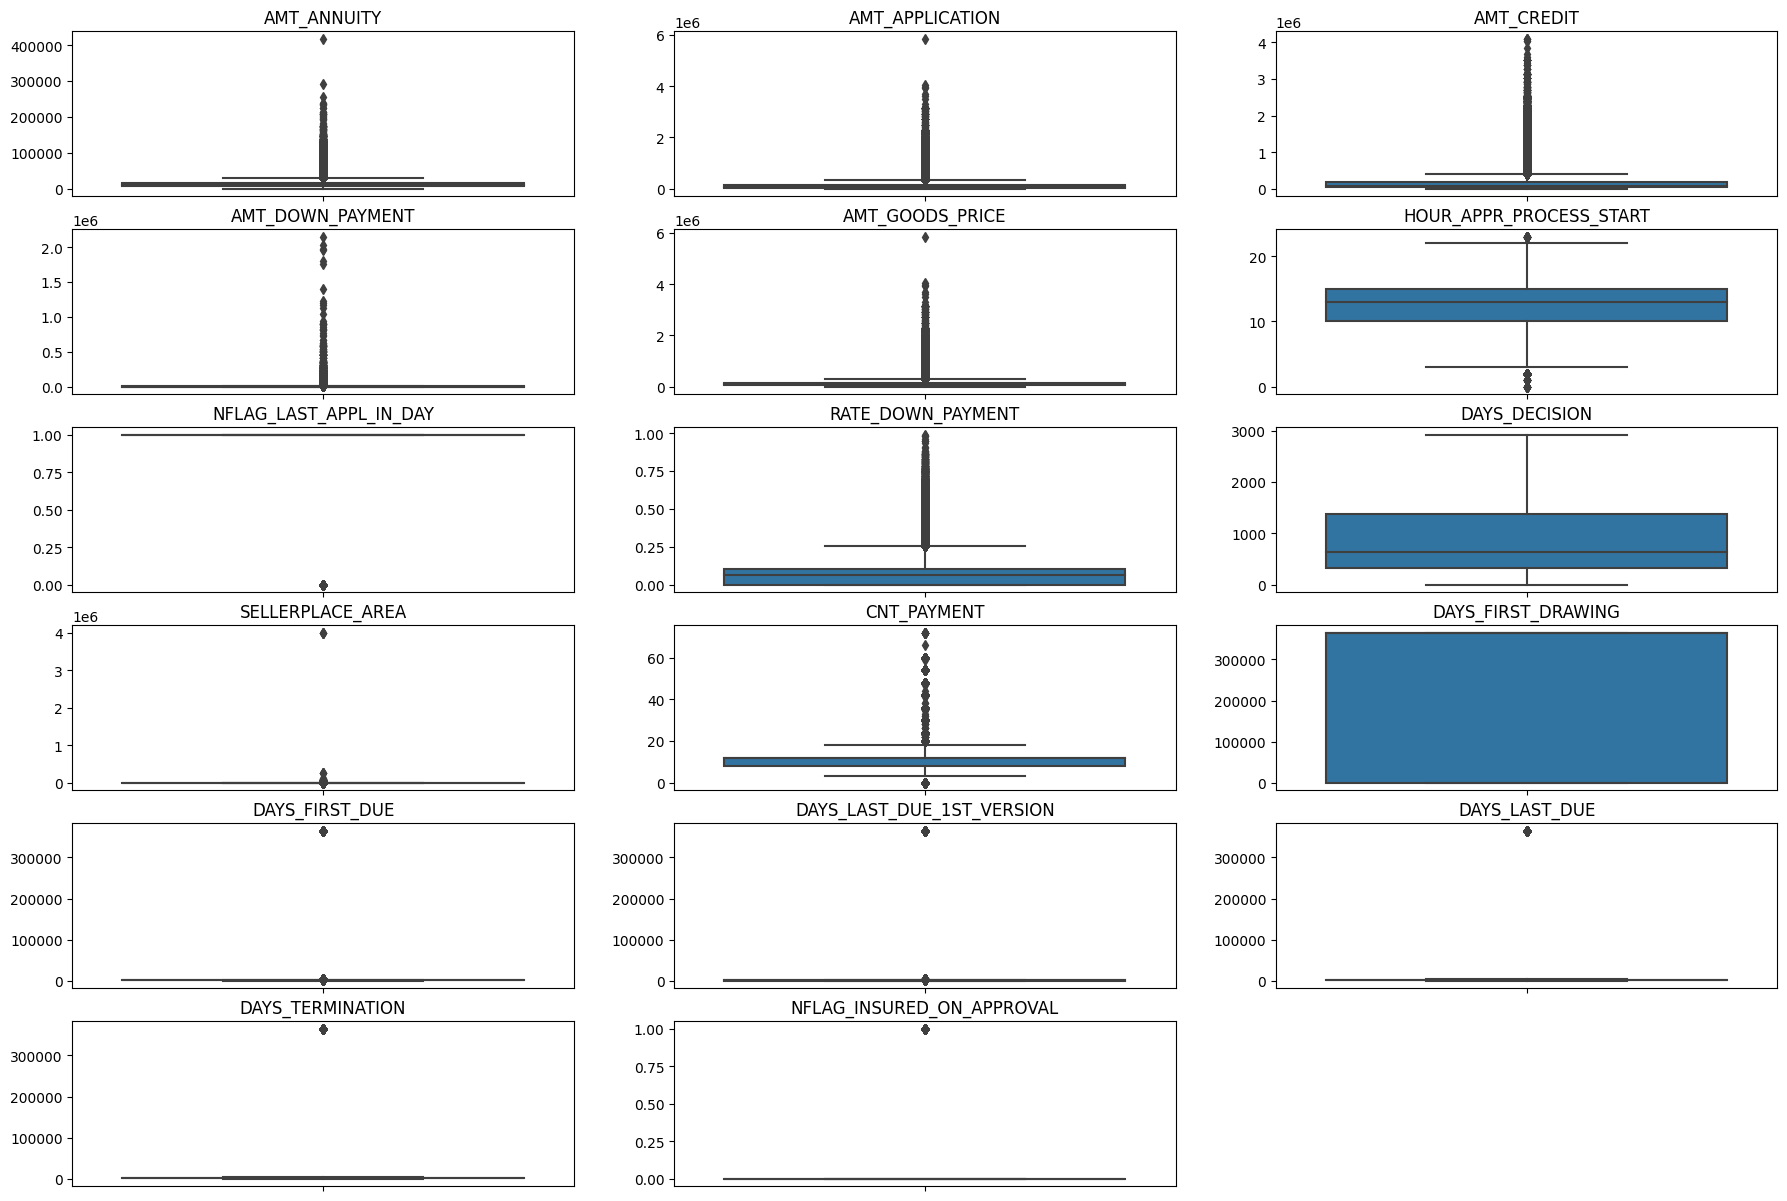

In [64]:
#identifying outlier and treatment
numer_col=numer_var1[['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']]
plt.figure(figsize=(22,15))
for i in enumerate(numer_col):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(y=numer_col[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [65]:
#checking their quantile values
numer_var1[['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START','RATE_DOWN_PAYMENT','SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']].quantile([0.75,0.95,0.99,1.0])

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0.75,15600.375,157500.0,175189.50,3870.00,157500.0,15.0,0.100788,148.0,12.0,365243.0,1294.0,1137.0,1892.0,1951.0
0.95,38250.000,675000.0,702000.00,21600.00,675000.0,18.0,0.217864,2100.0,36.0,365243.0,2677.0,365243.0,365243.0,365243.0
0.99,62337.600,1260000.0,1345394.16,51744.96,1260000.0,20.0,0.456276,4000.0,60.0,365243.0,365243.0,365243.0,365243.0,365243.0
1.00,417927.645,5850000.0,4104351.00,2150100.00,5850000.0,23.0,0.989740,4000000.0,72.0,365243.0,365243.0,365243.0,365243.0,365243.0


In [66]:
#checking other quantile value
numer_var1["DAYS_FIRST_DRAWING"].quantile(0.25)


263.0

In [67]:
#checking other quantile value
numer_var1["HOUR_APPR_PROCESS_START"].quantile(0.0001)

1.0

In [68]:
#TREATMENT OF THE OUTLIERS BY CAPPING THE MEDIAN/QUANTILE VALUE,and here doing it with quantile analysis
numer_var1.loc[numer_var1["AMT_ANNUITY"]>70000,["AMT_ANNUITY"]]=numer_var1["AMT_ANNUITY"].quantile(0.99)
numer_var1.loc[numer_var1["AMT_APPLICATION"]>1500000,["AMT_APPLICATION"]]=numer_var1["AMT_APPLICATION"].quantile(0.99)
numer_var1.loc[numer_var1["AMT_CREDIT"]>1500000,["AMT_CREDIT"]]=numer_var1["AMT_CREDIT"].quantile(0.99)
numer_var1.loc[numer_var1["AMT_DOWN_PAYMENT"]>100000,["AMT_DOWN_PAYMENT"]]=numer_var1["AMT_DOWN_PAYMENT"].quantile(0.99)
numer_var1.loc[numer_var1["AMT_GOODS_PRICE"]>1300000,["AMT_GOODS_PRICE"]]=numer_var1["AMT_GOODS_PRICE"].quantile(0.99)
numer_var1.loc[numer_var1["HOUR_APPR_PROCESS_START"]<=0,["HOUR_APPR_PROCESS_START"]]=numer_var1["HOUR_APPR_PROCESS_START"].quantile(0.01)
numer_var1.loc[numer_var1["RATE_DOWN_PAYMENT"]>0.5,["RATE_DOWN_PAYMENT"]]=numer_var1["RATE_DOWN_PAYMENT"].quantile(0.99)
numer_var1.loc[numer_var1["SELLERPLACE_AREA"]>5000,["SELLERPLACE_AREA"]]=numer_var1["SELLERPLACE_AREA"].quantile(0.99)
numer_var1.loc[numer_var1["CNT_PAYMENT"]>60,["CNT_PAYMENT"]]=numer_var1["CNT_PAYMENT"].quantile(0.99)
numer_var1.loc[numer_var1["DAYS_FIRST_DRAWING"]>300,["DAYS_FIRST_DRAWING"]]=numer_var1["DAYS_FIRST_DRAWING"].quantile(0.25)
numer_var1.loc[numer_var1["DAYS_FIRST_DUE"]>3000,["DAYS_FIRST_DUE"]]=numer_var1["DAYS_FIRST_DUE"].quantile(0.95)
numer_var1.loc[numer_var1["DAYS_LAST_DUE_1ST_VERSION"]>1200,["DAYS_LAST_DUE_1ST_VERSION"]]=numer_var1["DAYS_LAST_DUE_1ST_VERSION"].quantile(0.50)
numer_var1.loc[numer_var1["DAYS_LAST_DUE"]>2000,["DAYS_LAST_DUE"]]=numer_var1["DAYS_LAST_DUE"].quantile(0.50)
numer_var1.loc[numer_var1["DAYS_TERMINATION"]>2000,["DAYS_TERMINATION"]]=numer_var1["DAYS_TERMINATION"].quantile(0.50)

<Axes: >

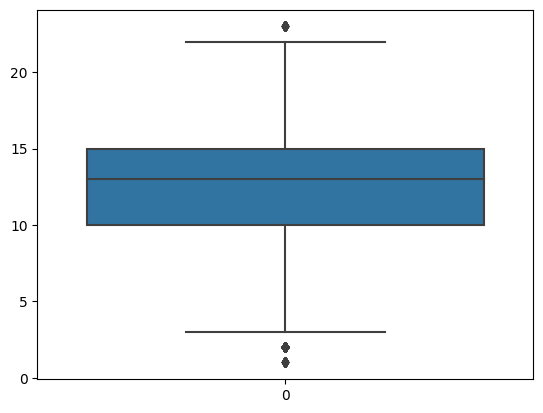

In [69]:
sns.boxplot(numer_var1["HOUR_APPR_PROCESS_START"])

In [70]:
#concatinating the numeric and categorical variable back in the data set
pre_data=pd.concat([numer_var1,cat_var1],axis=1)

MERGING BOTH THE DATA

In [71]:
merged_data = pd.merge(appl_data,pre_data, on= 'SK_ID_CURR', how='inner')
merged_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,Consumer electronics,high,Cash Street: high


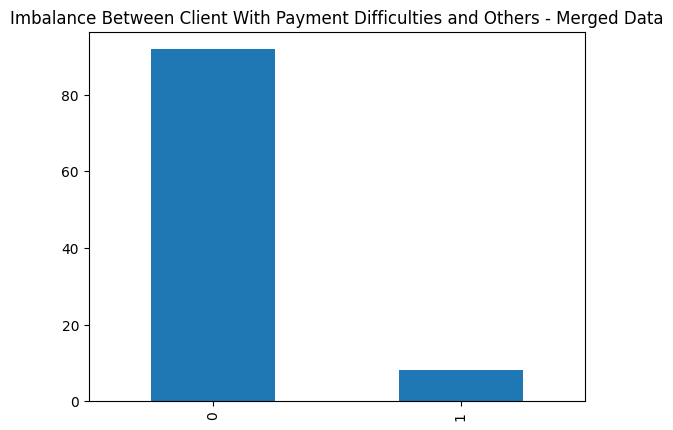

In [72]:
#Imbalance Between Client With Payment Difficulties and Others - Merged Data
plt.title ('Imbalance Between Client With Payment Difficulties and Others - Merged Data')
(merged_data["TARGET"].value_counts()/len(merged_data)*100).plot.bar()
plt.show()

Segregating the data based on Target=0 and Target=1

In [73]:
target_0 = appl_data[appl_data.TARGET ==0]
target_1 = appl_data[appl_data.TARGET ==1]

merged_0= merged_data[merged_data.TARGET == 0]
merged_1= merged_data[merged_data.TARGET == 1]

In [74]:
merged_0.shape

(267212, 86)

### *BIVARIATE* ***ANALYSIS***

ANALYSIS USING GRAPHS

In [75]:
##Bivariate analysis on Loan approval status with respect to few other columns

In [76]:
def plots(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(20,8))

    ax1 = plt.subplot(221)
    merged_data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plot for the column: '+ column + ' on overall data')


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((merged_0[col].value_counts())/len(merged_0))
    df['1']= ((merged_1[col].value_counts())/len(merged_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=merged_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Non-Defaulter in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=merged_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Defaulter in terms of percentage')



    fig.tight_layout()

    plt.show()

### The impotant variables seems affecting the targets are CODE_GENDER ,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE , NAME_EDUCATION_TYPE , NAME_FAMILY_STATUS , OCCUPATION_TYPE, ORGANIZATION_TYPE


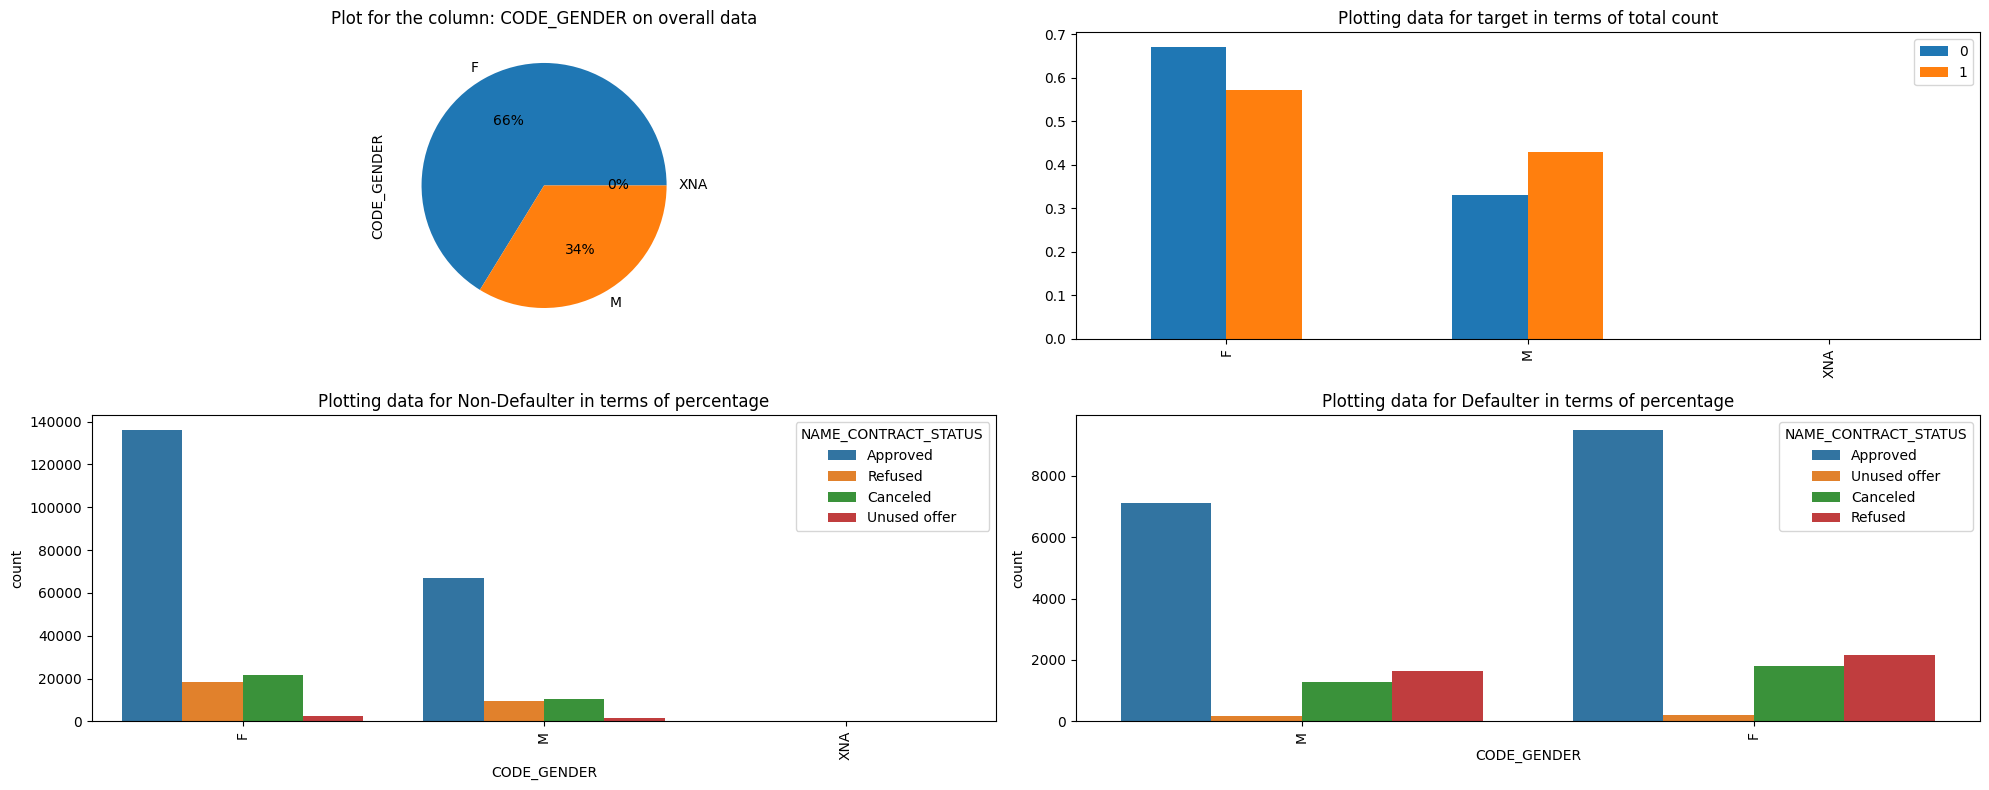

In [77]:
plots('CODE_GENDER','NAME_CONTRACT_STATUS')

INSIGHT

FEMALES GOT MORE LOAN GOT APPROVED WHEN COMPARED TO MEN AND THEY HAVE LESS REPAYER PERCENTAGE WHEN COMPARED TO MALE

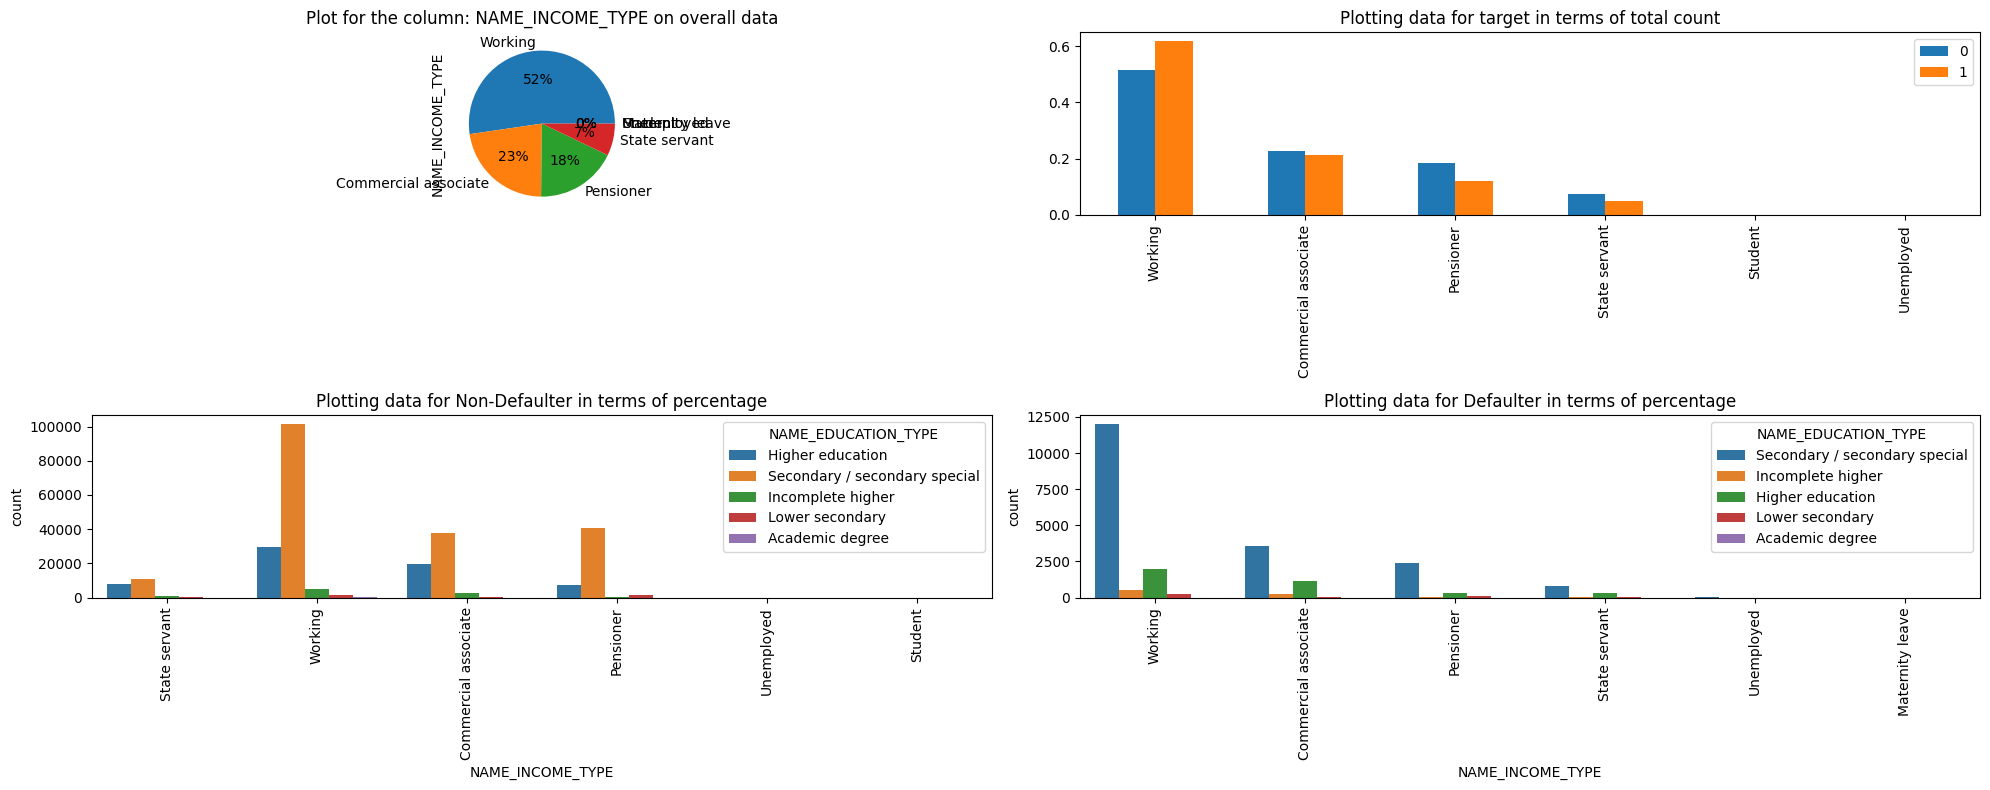

In [78]:
plots('NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE')

INSIGHTS

5O% OF LOAN APPLIERS ARE INCOME EARNERS THROUGH WORKING AND THEY HAVE MORE CUSTOMER WITH  PAYMENT DIFFICULTIES AND THE DEFAULTER AND NON DEFAULTER WORKING CUSTOMER ARE HIGHLY EDUCATED
BANK CAN GIVE LOAN TO OTHER CUSTOMER LIKE COMMERCIAL ASSOCIATE,PENSIONER THEY HAVE QUITE LESS PAYMENT DIFFICULTIES

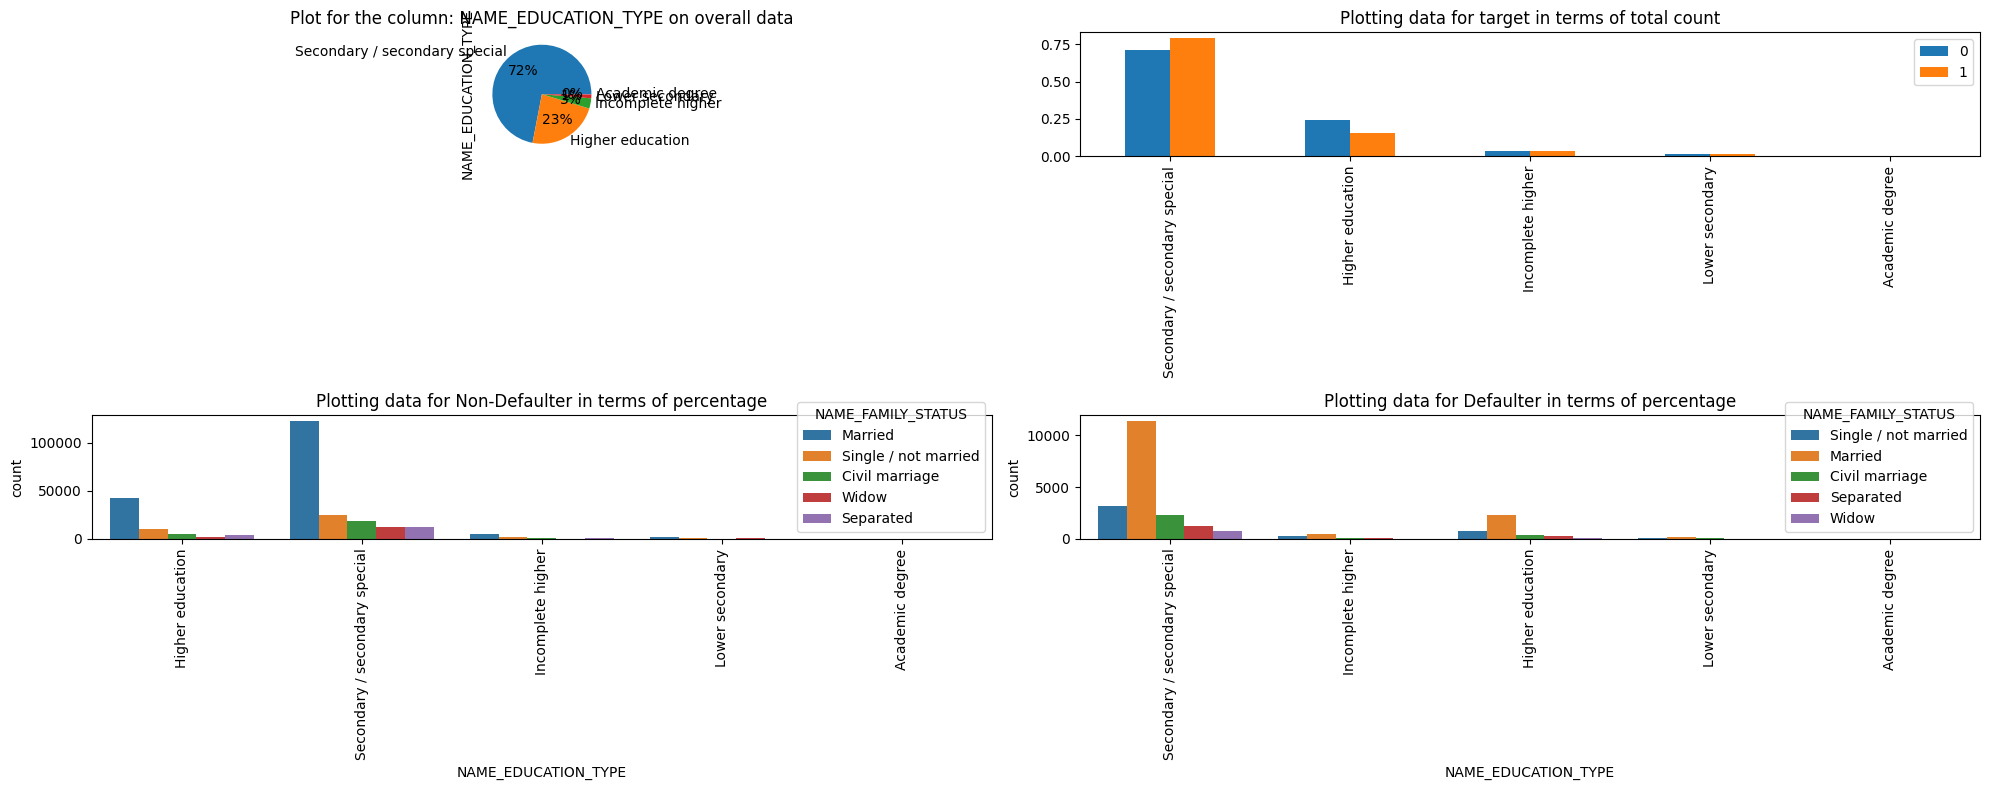

In [79]:
plots( 'NAME_EDUCATION_TYPE' , 'NAME_FAMILY_STATUS' )

INSIGHTS

AROUND 3/4 OF THE LOAN APPLICATION CUSTOMER ARE WELL EDUCATED PEOPLE OF SECONDARY SPECIAL AND MOST OF THEM ARE MARRIED IN BOTH DEFAULTER AND NON-DEFAULTER BUT THEY FACES PAYMENT DIFFICULTIES 
BANK CAN INCREASE THE LOAN OFFER TO HIGHER EDUCATION THEY ARE QUITE LESS IN PAYMENT DIFFICULTIES


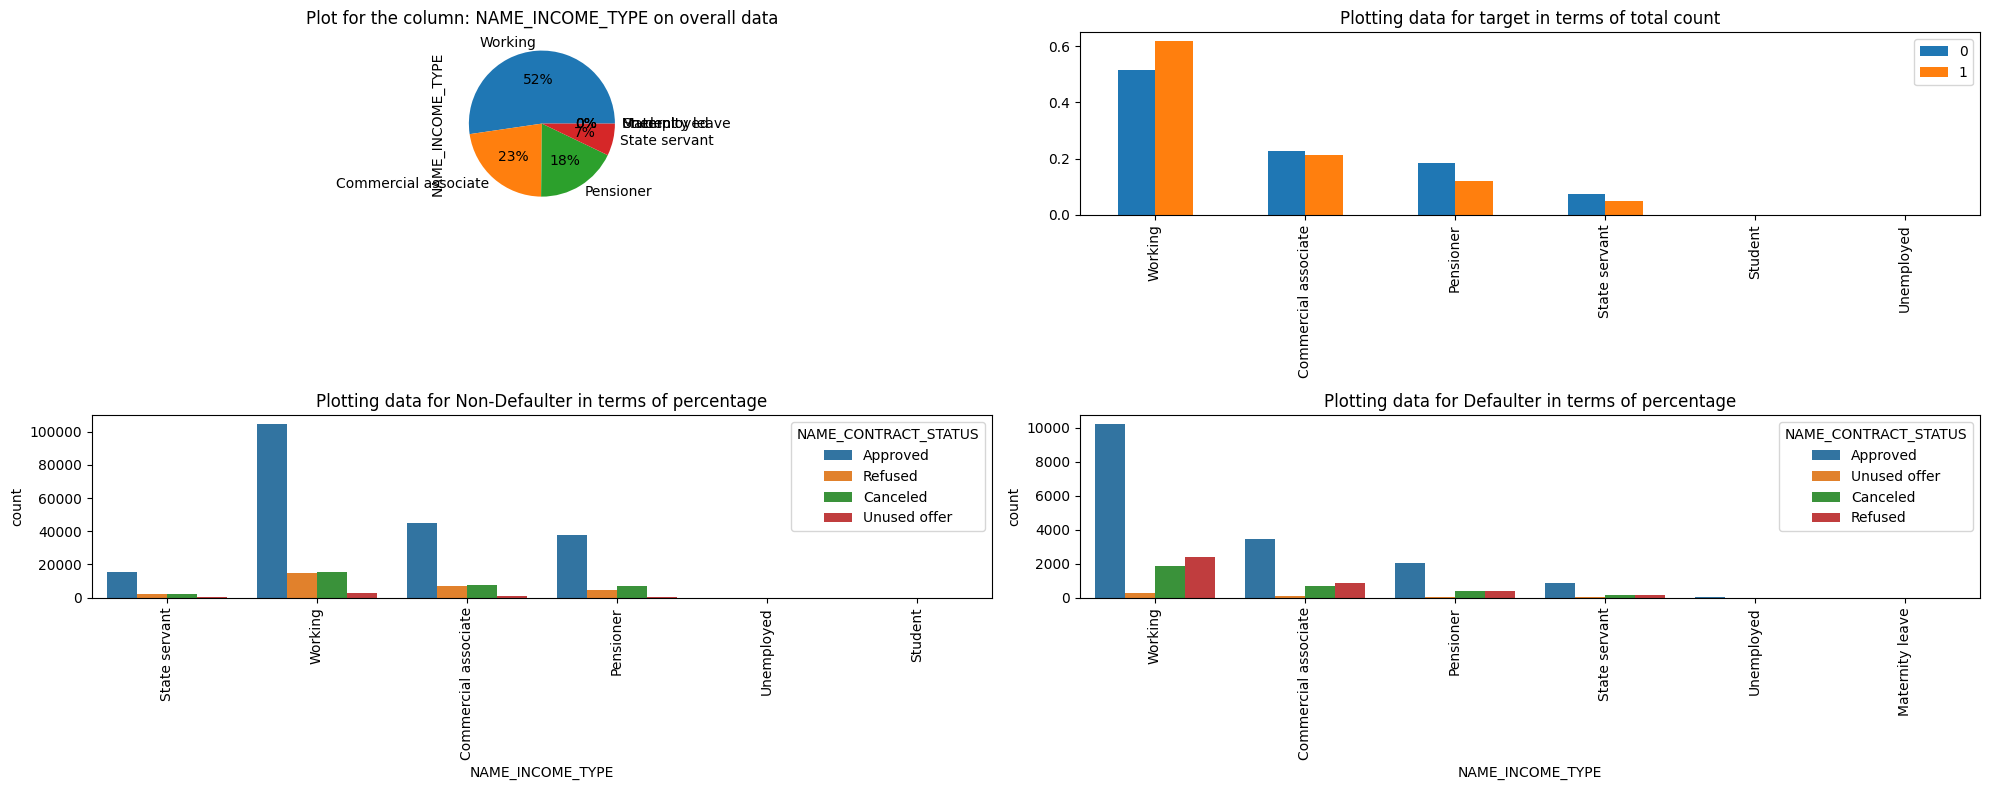

In [80]:
plots('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS')

INSIGHT

FOR BOTH THE DEFAULTER AND NON-DEFAULTER THE LOAN IS BEING APPROVED MOSTLY FOR THE WORKING CUSTOMER WHEN COMPARED TO OTHER CUSTOMER BUT THEY HAVE PAYMENT DIFFICULTIES AND CAN INCREASE THE LOAN APPLICATION FOR OTHERS

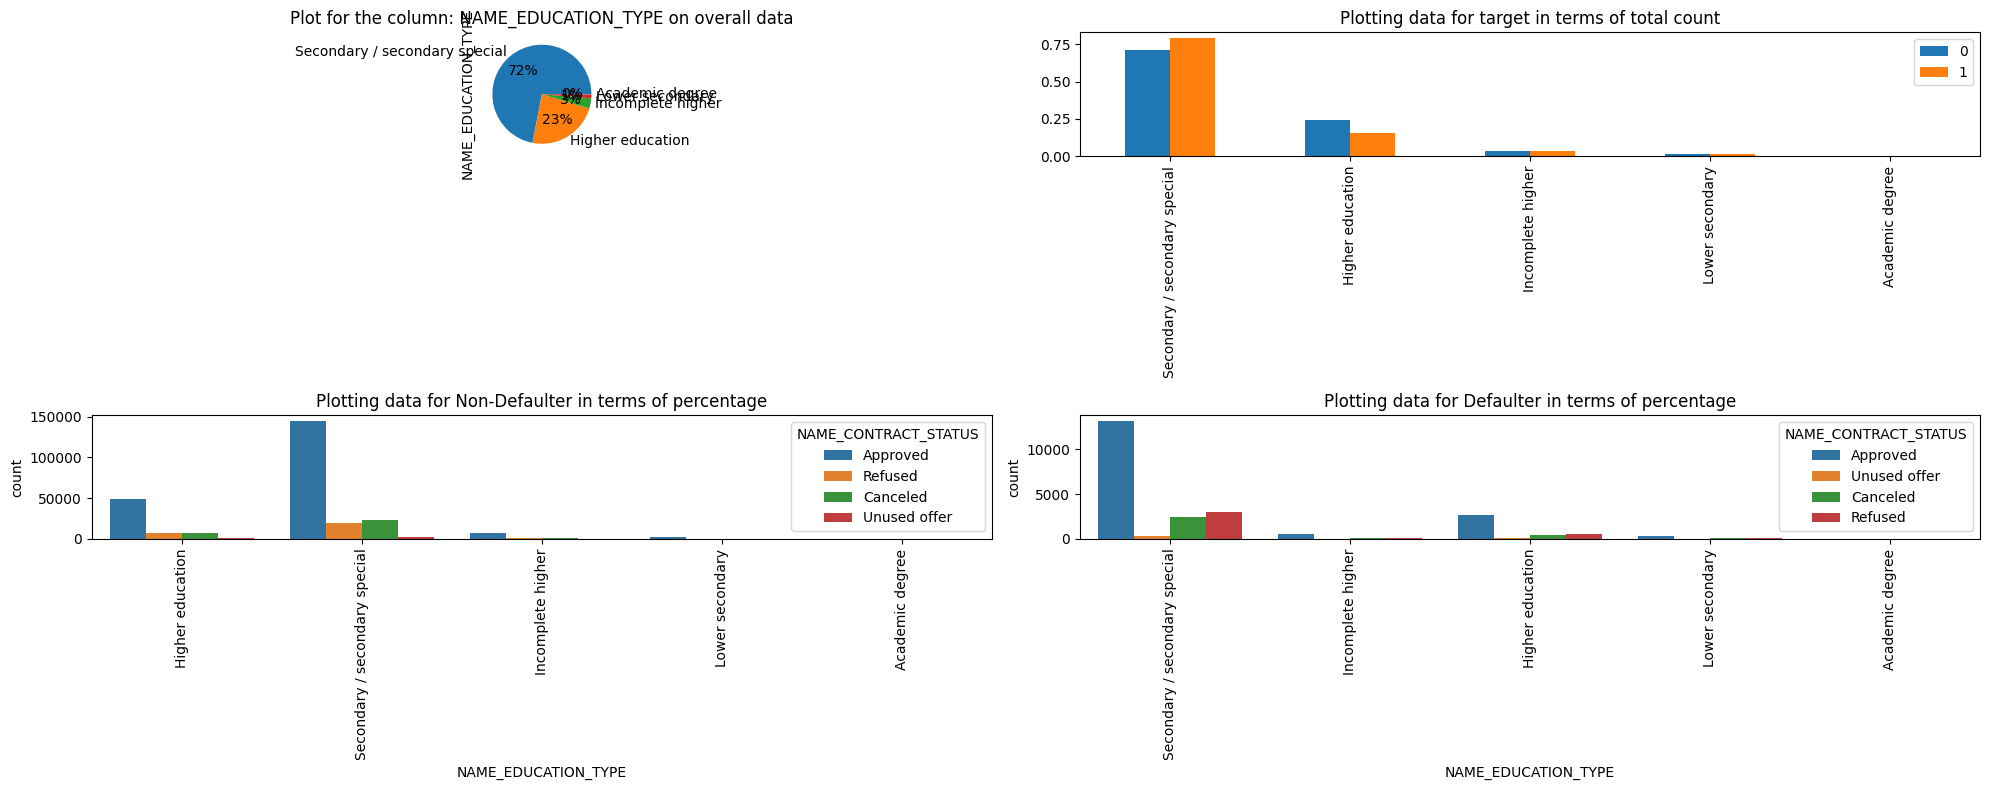

In [81]:
plots('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

INSIGHTS

SIMILAR TO THE ABOVE ANALYSIS THE LOAN FOR THE BOTH DEFAULTER AND NON-DEFAULTER ARE APPROVED HIGHLY FOR THE SECONDARY SPECIAL EDUCATED CUSTOMER BUT THEY HAVE MORE PAYMENT Difficulties
SO BANK CAN GIVE LOAN TO HIGHER EDUCATION CUSTOMER

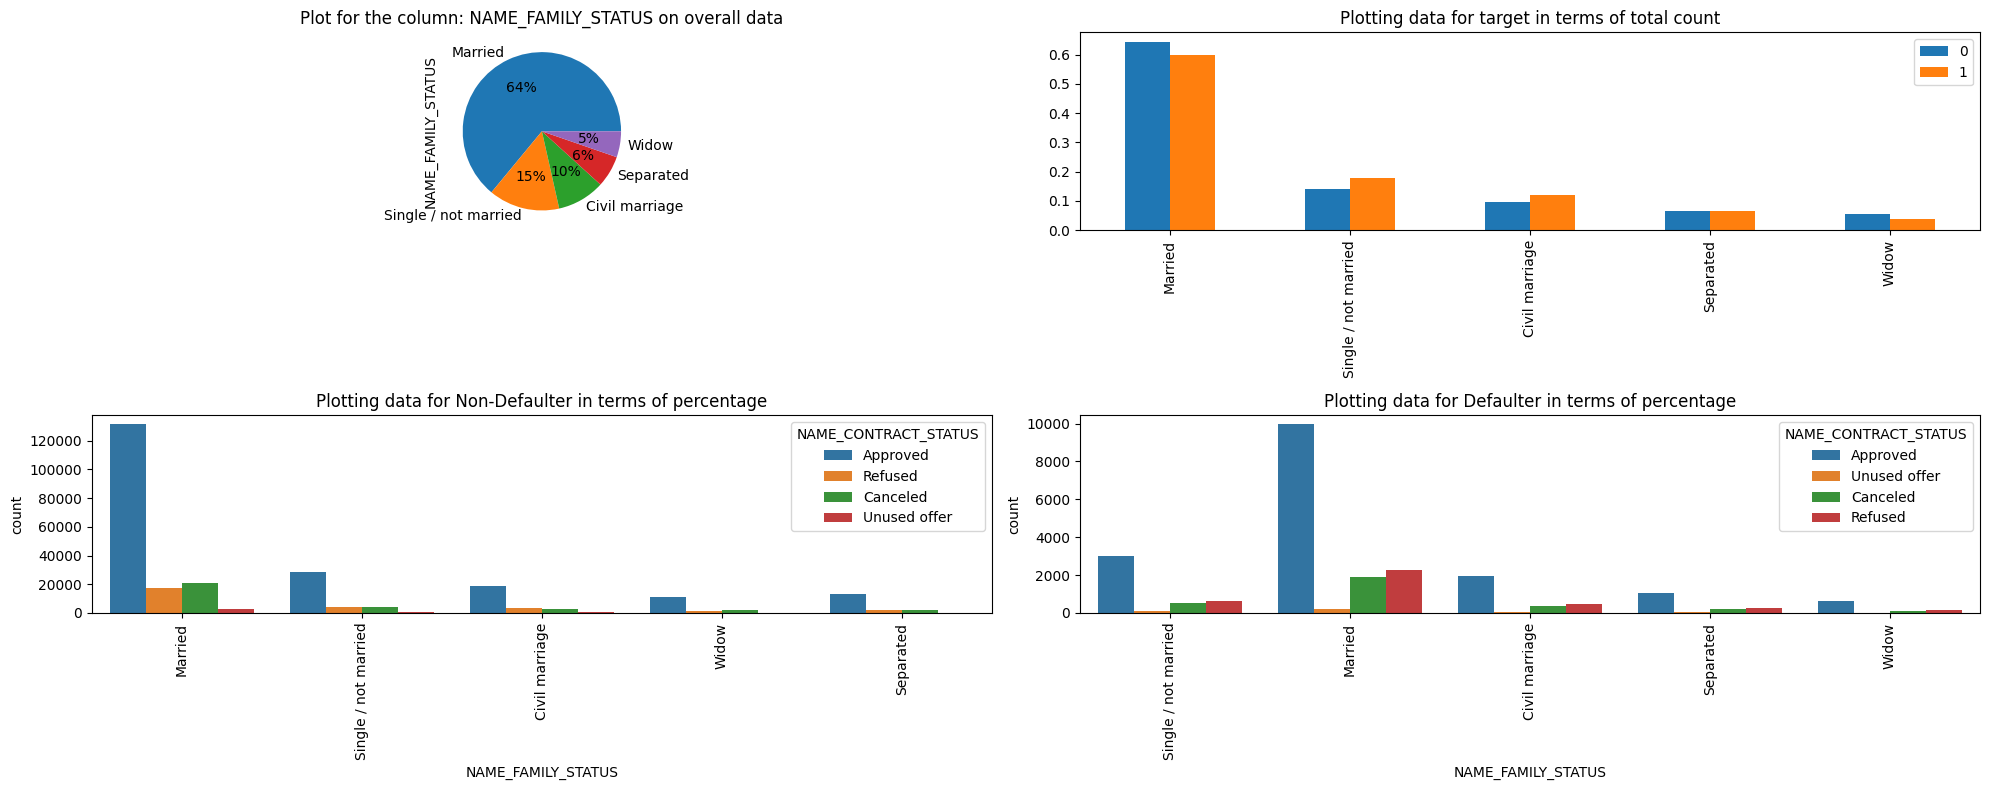

In [82]:
plots('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

INSIGHTS

MARRIED CUSTOMER ARE APPROVED LOAN MORE IN PERCENTAGE WHEN COMPARED TO OTHER CUSTOMER IN BOTH THE CASES AND THEY ARE HIGHLY FACING PAYMENT DIFFICULTIES WHEN COMPARED TO OTHERS
BUT THE PERCENTAGE OF REPAYER IS QUITE LESS IN ALL THE CASE WHEN COMPARED TO PAYMENT DIFFICULTIES

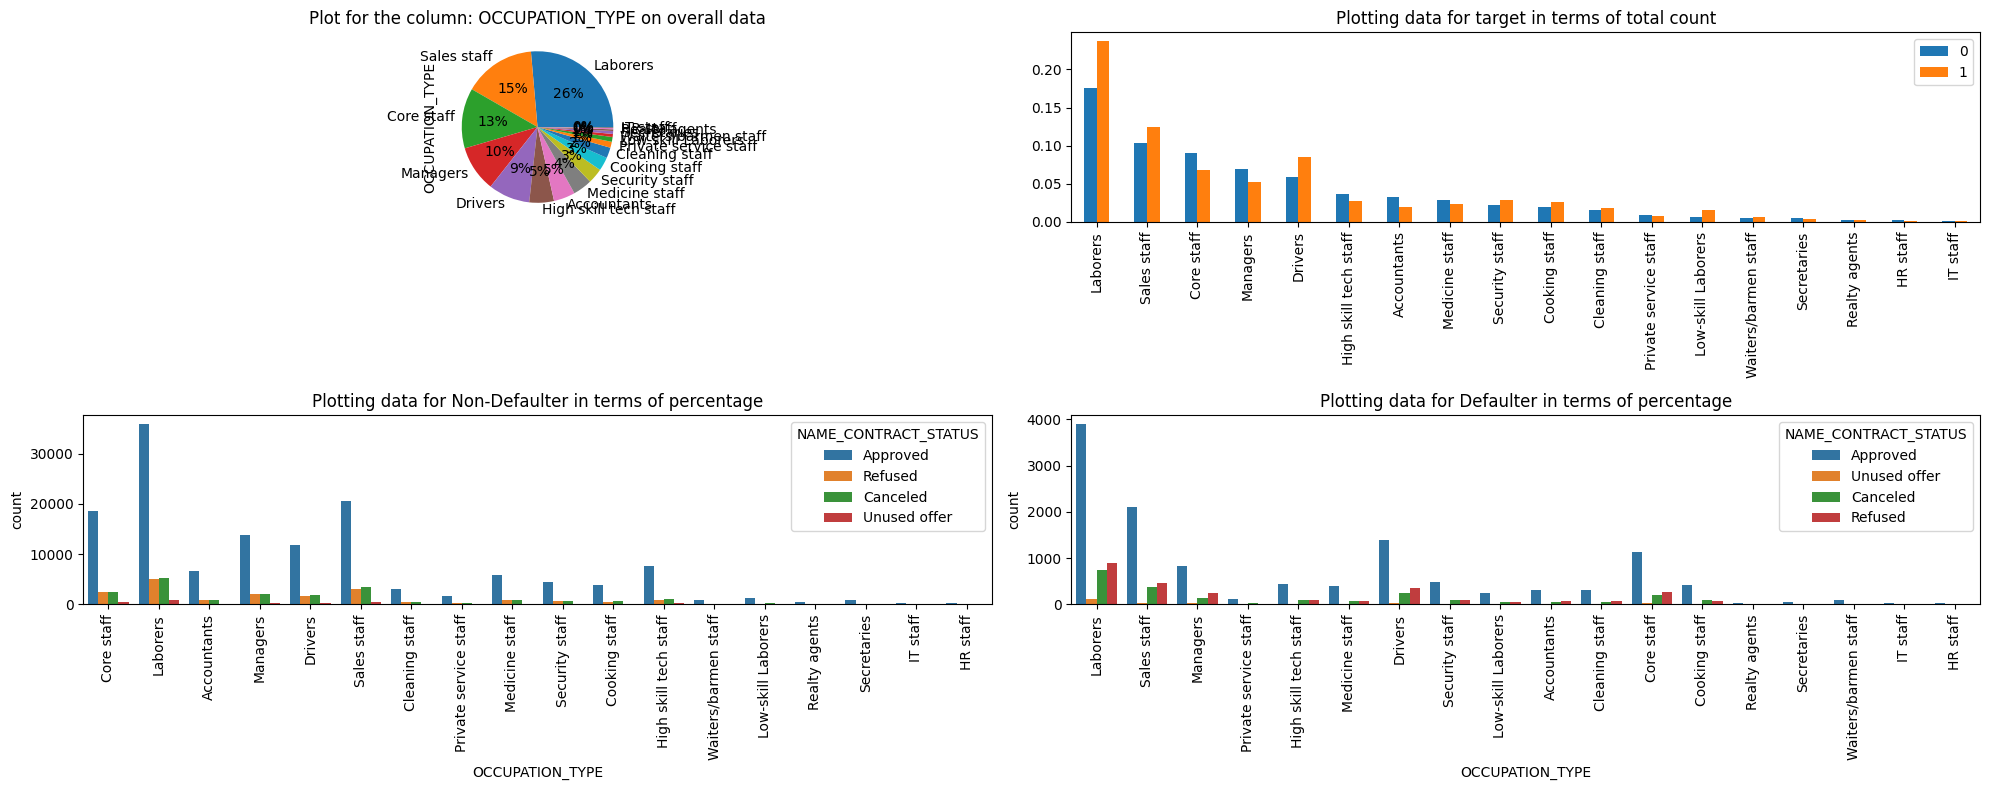

In [83]:
plots('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')

INSIGHTS

LABORERS ARE THE MORE CUSTOMER WHO GET LOAN AND THEY HAVE MORE PAYMENT DIFFICULTIES AND NEXT COMES THE SALES STAFF AND CORE STAFF
BANK CAN INCREASE THE LOAN OFFER TO CORE STAFF ,MANAGERS ..THEY HAVE LESS PAYMENT DIFFICULTIES WHEN COMPARED TO OTHERS

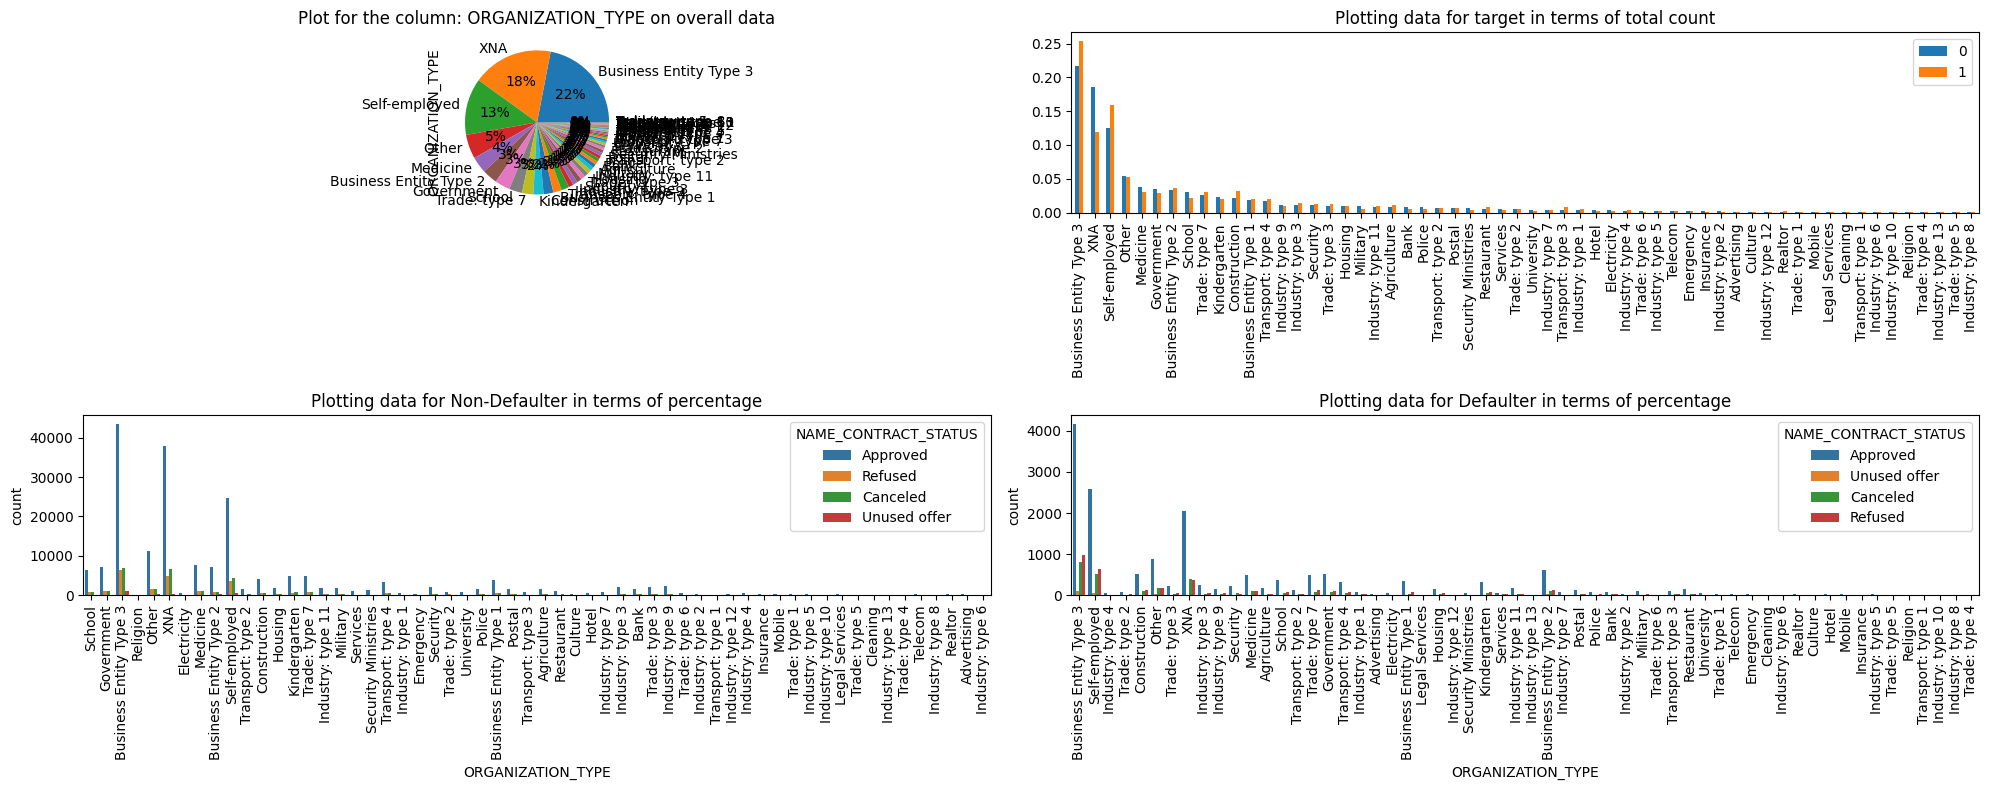

In [84]:
plots('ORGANIZATION_TYPE','NAME_CONTRACT_STATUS')

BANK PROVIDED MORE LOAN FOR THE BUSINESS ENTITY TYPE 3,SELF-EMPLOYED CATEGORIES BUT THEY ARE THE CASES HAVE MORE PAYMENT DIFFICULTIES..WHICH CAUSES LOSS FOR THE BANK ..SO THEY CAN CHOOSE OTHER FEILD(LIKE MEDICINE,GOVT,ETC..
 FOR PROVIDING LOAN

## Getting the top 15 correlation for the Non-Defaulter data

In [94]:
merged_0.corr().unstack().sort_values(ascending= False).drop_duplicates().head(20)

SK_ID_CURR                  SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998524
AMT_APPLICATION             AMT_GOODS_PRICE_y              0.988628
AMT_CREDIT_x                AMT_GOODS_PRICE_x              0.986298
AMT_CREDIT_y                AMT_GOODS_PRICE_y              0.967439
                            AMT_APPLICATION                0.966532
DAYS_LAST_DUE               DAYS_TERMINATION               0.963928
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.949239
CNT_CHILDREN                CNT_FAM_MEMBERS                0.875615
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.867661
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.860018
AMT_ANNUITY_y               AMT_GOODS_PRICE_y              0.835410
AMT_CREDIT_y                AMT_ANNUITY_y                  0.832050
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.831762
AMT_APPLICATION             AMT_ANNUITY_y       

In [102]:
merged_corr0 = merged_0[['AMT_CREDIT_y','AMT_GOODS_PRICE_y','AMT_APPLICATION', 'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
                      'CNT_FAM_MEMBERS','REG_REGION_NOT_WORK_REGION','CNT_CHILDREN', 'LIVE_REGION_NOT_WORK_REGION','AMT_ANNUITY_y',
                      'CNT_PAYMENT']]

In [103]:
corr=merged_corr0.corr()

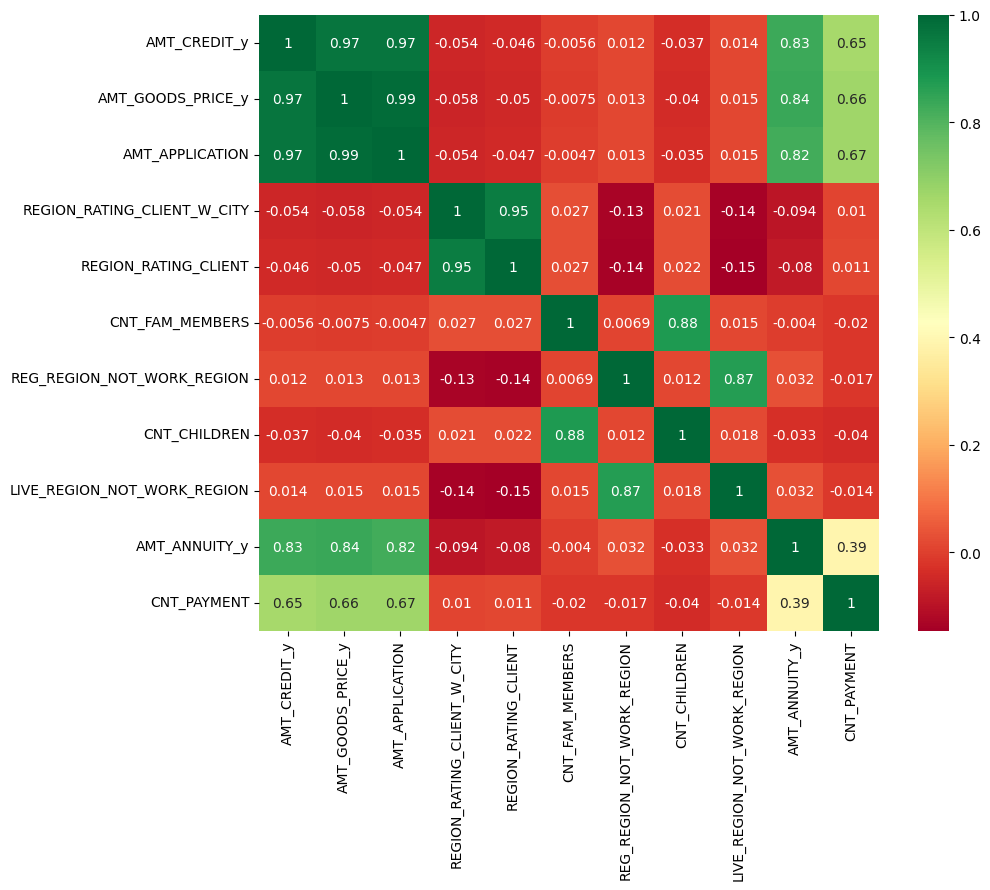

In [106]:
plt.figure(figsize = (10,8))
sns.heatmap(data=corr, cmap = 'RdYlGn',annot=True);

##CORRELATIONS

CNT_FAM_MEMBERS AND CNT_CHILDREN ARE HIGHLY CORRELATED

AMT_ANNUITY_y AND CNT_PAYMENT ARE CORRELATRED WITH AMT_GOODS_PRICE_y AND AMT_CREDIT_y



## ####END